In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import pickle
from multiprocessing import Pool
import time
import sys

ABPRED_DIR = Path.cwd().parent
if ABPRED_DIR not in sys.path:
    sys.path.append(str(ABPRED_DIR))
    
from AbPred.interface_contacts import InterfaceContacts
from AbPred.features_ic import ArpeggioFeatures
from AbPred.FoldX import FoldX
from features3D.Structural import run_pops
from features3D.Structural import POPS_parse2

import prody

/Users/vfica/Documents/GitHub/AbPred/AbPred/../libs/arpeggio


In [2]:
#Funcion para el sorting de paths por numero
def extract_num(pdb):
    return int(str(pdb.name).split(".")[2])
def sort_repair(pdb):
    return int(str(pdb.name).split(".")[2].split('_')[0])

def sort_df(df, column_idx, key):
    '''Takes dataframe, column index and custom function for sorting, 
    returns dataframe sorted by this column using this function'''
    
    col = df.ix[:,column_idx]
    temp = np.array(col.values.tolist())
    order = sorted(range(len(temp)), key=lambda j: key(temp[j]))
    return df.ix[order]

In [3]:
CWD = Path.cwd()


# PDBs structures
PDBS_MUT = Path("../data/modelled_mutations/")
PDBS_WT = Path("../data/AB-Bind-Database-master/")
# Data 
ab_bind_mCSM_HM = pd.read_csv("../data/ab_bind_mCSM_HM.csv",index_col=0)

In [4]:
ic_files = list(PDBS_MUT.glob("*.interface_contacts"))
pdb_files = list(PDBS_MUT.glob("*clean.pdb"))

ic_files.sort(key=sort_repair)
pdb_files.sort(key=sort_repair)

# Extract contact residue pairs from sift interface contacts

In [55]:
features = np.empty((len(pdb_files),15))
for i,(ic,pdb) in enumerate(zip(ic_files,pdb_files)):
    print(ic,pdb)
    ic_features = ArpeggioFeatures(level_sift="normal")
    ic_features.parse_contactdata(icfile=ic)
    ic_features.parse_pdbdata(pdbfile=pdb)
    
    contacts = ic_features.get_features()
    
    
    features[i] = contacts

../data/modelled_mutations/1AK4.mut.0_Repair.clean.interface_contacts ../data/modelled_mutations/1AK4.mut.0_Repair.clean.pdb
../data/modelled_mutations/1AK4.mut.1_Repair.clean.interface_contacts ../data/modelled_mutations/1AK4.mut.1_Repair.clean.pdb
../data/modelled_mutations/1AK4.mut.2_Repair.clean.interface_contacts ../data/modelled_mutations/1AK4.mut.2_Repair.clean.pdb
../data/modelled_mutations/1AK4.mut.3_Repair.clean.interface_contacts ../data/modelled_mutations/1AK4.mut.3_Repair.clean.pdb
../data/modelled_mutations/1AK4.mut.4_Repair.clean.interface_contacts ../data/modelled_mutations/1AK4.mut.4_Repair.clean.pdb
../data/modelled_mutations/1AK4.mut.5_Repair.clean.interface_contacts ../data/modelled_mutations/1AK4.mut.5_Repair.clean.pdb
../data/modelled_mutations/1AK4.mut.6_Repair.clean.interface_contacts ../data/modelled_mutations/1AK4.mut.6_Repair.clean.pdb
../data/modelled_mutations/1AK4.mut.7_Repair.clean.interface_contacts ../data/modelled_mutations/1AK4.mut.7_Repair.clean.pdb


../data/modelled_mutations/1DQJ.mut.65_Repair.clean.interface_contacts ../data/modelled_mutations/1DQJ.mut.65_Repair.clean.pdb
../data/modelled_mutations/1DQJ.mut.66_Repair.clean.interface_contacts ../data/modelled_mutations/1DQJ.mut.66_Repair.clean.pdb
../data/modelled_mutations/1DQJ.mut.67_Repair.clean.interface_contacts ../data/modelled_mutations/1DQJ.mut.67_Repair.clean.pdb
../data/modelled_mutations/1DQJ.mut.68_Repair.clean.interface_contacts ../data/modelled_mutations/1DQJ.mut.68_Repair.clean.pdb
../data/modelled_mutations/1DQJ.mut.69_Repair.clean.interface_contacts ../data/modelled_mutations/1DQJ.mut.69_Repair.clean.pdb
../data/modelled_mutations/1DQJ.mut.70_Repair.clean.interface_contacts ../data/modelled_mutations/1DQJ.mut.70_Repair.clean.pdb
../data/modelled_mutations/1DQJ.mut.71_Repair.clean.interface_contacts ../data/modelled_mutations/1DQJ.mut.71_Repair.clean.pdb
../data/modelled_mutations/1DQJ.mut.72_Repair.clean.interface_contacts ../data/modelled_mutations/1DQJ.mut.72_R

../data/modelled_mutations/1KTZ.mut.130_Repair.clean.interface_contacts ../data/modelled_mutations/1KTZ.mut.130_Repair.clean.pdb
../data/modelled_mutations/1KTZ.mut.131_Repair.clean.interface_contacts ../data/modelled_mutations/1KTZ.mut.131_Repair.clean.pdb
../data/modelled_mutations/1KTZ.mut.132_Repair.clean.interface_contacts ../data/modelled_mutations/1KTZ.mut.132_Repair.clean.pdb
../data/modelled_mutations/1KTZ.mut.133_Repair.clean.interface_contacts ../data/modelled_mutations/1KTZ.mut.133_Repair.clean.pdb
../data/modelled_mutations/1KTZ.mut.134_Repair.clean.interface_contacts ../data/modelled_mutations/1KTZ.mut.134_Repair.clean.pdb
../data/modelled_mutations/1KTZ.mut.135_Repair.clean.interface_contacts ../data/modelled_mutations/1KTZ.mut.135_Repair.clean.pdb
../data/modelled_mutations/1KTZ.mut.136_Repair.clean.interface_contacts ../data/modelled_mutations/1KTZ.mut.136_Repair.clean.pdb
../data/modelled_mutations/1KTZ.mut.137_Repair.clean.interface_contacts ../data/modelled_mutation

../data/modelled_mutations/1MHP.mut.194_Repair.clean.interface_contacts ../data/modelled_mutations/1MHP.mut.194_Repair.clean.pdb
../data/modelled_mutations/1MHP.mut.195_Repair.clean.interface_contacts ../data/modelled_mutations/1MHP.mut.195_Repair.clean.pdb
../data/modelled_mutations/1MHP.mut.196_Repair.clean.interface_contacts ../data/modelled_mutations/1MHP.mut.196_Repair.clean.pdb
../data/modelled_mutations/1MHP.mut.197_Repair.clean.interface_contacts ../data/modelled_mutations/1MHP.mut.197_Repair.clean.pdb
../data/modelled_mutations/1MHP.mut.198_Repair.clean.interface_contacts ../data/modelled_mutations/1MHP.mut.198_Repair.clean.pdb
../data/modelled_mutations/1MHP.mut.199_Repair.clean.interface_contacts ../data/modelled_mutations/1MHP.mut.199_Repair.clean.pdb
../data/modelled_mutations/1MHP.mut.200_Repair.clean.interface_contacts ../data/modelled_mutations/1MHP.mut.200_Repair.clean.pdb
../data/modelled_mutations/1MHP.mut.201_Repair.clean.interface_contacts ../data/modelled_mutation

../data/modelled_mutations/1VFB.mut.258_Repair.clean.interface_contacts ../data/modelled_mutations/1VFB.mut.258_Repair.clean.pdb
../data/modelled_mutations/1VFB.mut.259_Repair.clean.interface_contacts ../data/modelled_mutations/1VFB.mut.259_Repair.clean.pdb
../data/modelled_mutations/1VFB.mut.260_Repair.clean.interface_contacts ../data/modelled_mutations/1VFB.mut.260_Repair.clean.pdb
../data/modelled_mutations/1VFB.mut.261_Repair.clean.interface_contacts ../data/modelled_mutations/1VFB.mut.261_Repair.clean.pdb
../data/modelled_mutations/1VFB.mut.262_Repair.clean.interface_contacts ../data/modelled_mutations/1VFB.mut.262_Repair.clean.pdb
../data/modelled_mutations/1VFB.mut.263_Repair.clean.interface_contacts ../data/modelled_mutations/1VFB.mut.263_Repair.clean.pdb
../data/modelled_mutations/1VFB.mut.264_Repair.clean.interface_contacts ../data/modelled_mutations/1VFB.mut.264_Repair.clean.pdb
../data/modelled_mutations/1VFB.mut.265_Repair.clean.interface_contacts ../data/modelled_mutation

../data/modelled_mutations/2JEL.mut.322_Repair.clean.interface_contacts ../data/modelled_mutations/2JEL.mut.322_Repair.clean.pdb
../data/modelled_mutations/2JEL.mut.323_Repair.clean.interface_contacts ../data/modelled_mutations/2JEL.mut.323_Repair.clean.pdb
../data/modelled_mutations/2JEL.mut.324_Repair.clean.interface_contacts ../data/modelled_mutations/2JEL.mut.324_Repair.clean.pdb
../data/modelled_mutations/2JEL.mut.325_Repair.clean.interface_contacts ../data/modelled_mutations/2JEL.mut.325_Repair.clean.pdb
../data/modelled_mutations/2JEL.mut.326_Repair.clean.interface_contacts ../data/modelled_mutations/2JEL.mut.326_Repair.clean.pdb
../data/modelled_mutations/2JEL.mut.327_Repair.clean.interface_contacts ../data/modelled_mutations/2JEL.mut.327_Repair.clean.pdb
../data/modelled_mutations/2JEL.mut.328_Repair.clean.interface_contacts ../data/modelled_mutations/2JEL.mut.328_Repair.clean.pdb
../data/modelled_mutations/2JEL.mut.329_Repair.clean.interface_contacts ../data/modelled_mutation

../data/modelled_mutations/2NZ9.mut.386_Repair.clean.interface_contacts ../data/modelled_mutations/2NZ9.mut.386_Repair.clean.pdb
../data/modelled_mutations/2NZ9.mut.387_Repair.clean.interface_contacts ../data/modelled_mutations/2NZ9.mut.387_Repair.clean.pdb
../data/modelled_mutations/3BDY.mut.388_Repair.clean.interface_contacts ../data/modelled_mutations/3BDY.mut.388_Repair.clean.pdb
../data/modelled_mutations/3BDY.mut.389_Repair.clean.interface_contacts ../data/modelled_mutations/3BDY.mut.389_Repair.clean.pdb
../data/modelled_mutations/3BDY.mut.390_Repair.clean.interface_contacts ../data/modelled_mutations/3BDY.mut.390_Repair.clean.pdb
../data/modelled_mutations/3BDY.mut.391_Repair.clean.interface_contacts ../data/modelled_mutations/3BDY.mut.391_Repair.clean.pdb
../data/modelled_mutations/3BDY.mut.392_Repair.clean.interface_contacts ../data/modelled_mutations/3BDY.mut.392_Repair.clean.pdb
../data/modelled_mutations/3BDY.mut.393_Repair.clean.interface_contacts ../data/modelled_mutation

../data/modelled_mutations/3BE1.mut.450_Repair.clean.interface_contacts ../data/modelled_mutations/3BE1.mut.450_Repair.clean.pdb
../data/modelled_mutations/3BE1.mut.451_Repair.clean.interface_contacts ../data/modelled_mutations/3BE1.mut.451_Repair.clean.pdb
../data/modelled_mutations/3BE1.mut.452_Repair.clean.interface_contacts ../data/modelled_mutations/3BE1.mut.452_Repair.clean.pdb
../data/modelled_mutations/3BE1.mut.453_Repair.clean.interface_contacts ../data/modelled_mutations/3BE1.mut.453_Repair.clean.pdb
../data/modelled_mutations/3BE1.mut.454_Repair.clean.interface_contacts ../data/modelled_mutations/3BE1.mut.454_Repair.clean.pdb
../data/modelled_mutations/3BE1.mut.455_Repair.clean.interface_contacts ../data/modelled_mutations/3BE1.mut.455_Repair.clean.pdb
../data/modelled_mutations/3BN9.mut.456_Repair.clean.interface_contacts ../data/modelled_mutations/3BN9.mut.456_Repair.clean.pdb
../data/modelled_mutations/3BN9.mut.457_Repair.clean.interface_contacts ../data/modelled_mutation

../data/modelled_mutations/3K2M.mut.514_Repair.clean.interface_contacts ../data/modelled_mutations/3K2M.mut.514_Repair.clean.pdb
../data/modelled_mutations/3K2M.mut.515_Repair.clean.interface_contacts ../data/modelled_mutations/3K2M.mut.515_Repair.clean.pdb
../data/modelled_mutations/3K2M.mut.516_Repair.clean.interface_contacts ../data/modelled_mutations/3K2M.mut.516_Repair.clean.pdb
../data/modelled_mutations/3K2M.mut.517_Repair.clean.interface_contacts ../data/modelled_mutations/3K2M.mut.517_Repair.clean.pdb
../data/modelled_mutations/3K2M.mut.518_Repair.clean.interface_contacts ../data/modelled_mutations/3K2M.mut.518_Repair.clean.pdb
../data/modelled_mutations/3K2M.mut.519_Repair.clean.interface_contacts ../data/modelled_mutations/3K2M.mut.519_Repair.clean.pdb
../data/modelled_mutations/3NGB.mut.520_Repair.clean.interface_contacts ../data/modelled_mutations/3NGB.mut.520_Repair.clean.pdb
../data/modelled_mutations/3NGB.mut.521_Repair.clean.interface_contacts ../data/modelled_mutation

../data/modelled_mutations/HM_1KTZ.mut.578_Repair.clean.interface_contacts ../data/modelled_mutations/HM_1KTZ.mut.578_Repair.clean.pdb
../data/modelled_mutations/HM_1KTZ.mut.579_Repair.clean.interface_contacts ../data/modelled_mutations/HM_1KTZ.mut.579_Repair.clean.pdb
../data/modelled_mutations/HM_1YY9.mut.580_Repair.clean.interface_contacts ../data/modelled_mutations/HM_1YY9.mut.580_Repair.clean.pdb
../data/modelled_mutations/HM_1YY9.mut.581_Repair.clean.interface_contacts ../data/modelled_mutations/HM_1YY9.mut.581_Repair.clean.pdb
../data/modelled_mutations/HM_1YY9.mut.582_Repair.clean.interface_contacts ../data/modelled_mutations/HM_1YY9.mut.582_Repair.clean.pdb
../data/modelled_mutations/HM_1YY9.mut.583_Repair.clean.interface_contacts ../data/modelled_mutations/HM_1YY9.mut.583_Repair.clean.pdb
../data/modelled_mutations/HM_1YY9.mut.584_Repair.clean.interface_contacts ../data/modelled_mutations/HM_1YY9.mut.584_Repair.clean.pdb
../data/modelled_mutations/HM_1YY9.mut.585_Repair.clean

../data/modelled_mutations/HM_3BN9.mut.639_Repair.clean.interface_contacts ../data/modelled_mutations/HM_3BN9.mut.639_Repair.clean.pdb
../data/modelled_mutations/HM_3BN9.mut.640_Repair.clean.interface_contacts ../data/modelled_mutations/HM_3BN9.mut.640_Repair.clean.pdb
../data/modelled_mutations/HM_3BN9.mut.641_Repair.clean.interface_contacts ../data/modelled_mutations/HM_3BN9.mut.641_Repair.clean.pdb
../data/modelled_mutations/HM_3BN9.mut.642_Repair.clean.interface_contacts ../data/modelled_mutations/HM_3BN9.mut.642_Repair.clean.pdb
../data/modelled_mutations/HM_3BN9.mut.643_Repair.clean.interface_contacts ../data/modelled_mutations/HM_3BN9.mut.643_Repair.clean.pdb
../data/modelled_mutations/HM_3BN9.mut.644_Repair.clean.interface_contacts ../data/modelled_mutations/HM_3BN9.mut.644_Repair.clean.pdb


In [70]:
DF_contact_mut = pd.DataFrame(features, index=[pdb.name for pdb in pdb_files],columns=DF_contact_deprecated.columns[:15].str[:-2])

In [73]:
DF_contact_mut.to_csv("../data/DF_contact15_mut_2019.csv",)

In [4]:
DF_contact_mut = pd.read_csv("../data/DF_contact_mut_2019.csv",index_col=0)
#DF_contact_deprecated = pd.read_csv("../data/DF_mutated_features300.v2.csv",index_col=0)

In [23]:
DF_contact_mut.columns =  DF_contact_deprecated.drop("ddG(kcal/mol)",axis=1).columns
DF_contact_mut.to_csv("../data/DF_contact300_mut_2019.csv")

# Energetic data
## Mutants

In [21]:
energetic_features = np.empty((len(pdb_files),29))

try:
    os.chdir(PDBS_MUT)
    
    for i,pdb in enumerate(pdb_files):
        partners = ab_bind_mCSM_HM["Partners(A_B)"].iloc[i]
        foldx = FoldX(verbose=False)
        result_analyse = foldx.analyse_complex(pdb_file=pdb.name, partners=partners)
        energetic_features[i] = result_analyse
finally:
    os.chdir(CWD)


foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin 

foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin 

foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin 

In [43]:
DF_energetic_mut = pd.DataFrame(energetic_features,index=[pdb.name for pdb in pdb_files])
DF_energetic_mut.to_csv("../data/DF_energetic_mut.csv")

## Wildtype

In [55]:
pdb_partner = (ab_bind_mCSM_HM["#PDB"]+"/"+ab_bind_mCSM_HM["Partners(A_B)"]).unique()


In [45]:
pdbwt_files = list(PDBS_WT.glob("*clean.pdb"))


In [48]:
energetic_features_wt = np.empty((len(pdbwt_files),29))

try:
    os.chdir(PDBS_WT)
    
    for i,pdb in enumerate(pdbwt_files):
        partners = pdb_partner[i].split("/")[1]
        foldx = FoldX(verbose=False)
        result_analyse = foldx.analyse_complex(pdb_file=pdb.name, partners=partners)
        energetic_features_wt[i] = result_analyse
finally:
    os.chdir(CWD)

foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH
foldx bin folder already in PATH


In [53]:
DF_energetic_wt = pd.DataFrame(energetic_features_wt,index=[pdb.name for pdb in pdbwt_files])
DF_energetic_wt.head()

,intraclashes_energy_1_wt,intraclashes_energy_2_wt,dg_wt,backbone_hbond_wt,sidechain_hbond_wt,van_der_waals_wt,electrostatics_wt,solvation_polar_wt,solvation_hydrophobic_wt,van_der_waals_clashes_wt,...,disulfide_wt,electrostatic_kon_wt,partial_covalent_bonds_wt,energy_ionisation_wt,entropy_complex_wt,number_of_residues,interface_residues_wt,interface_residues_clashing_wt,interface_residues_vdw_clashing_wt,interface_residues_bb_clashing_wt
1AK4_Repair.clean.pdb,14.6025,15.6655,-10.5068,-4.26711,-2.29253,-9.04837,-0.060860,10.1766,-11.7670,0.255299,...,0.000000e+00,-0.062112,0.0,0.046189,2.384,310.0,27.0,0.0,0.0,0.0
1BJ1_Repair.clean.pdb,42.0816,18.0966,-16.5198,-7.82241,-8.75508,-21.46970,0.468553,28.3970,-25.6889,3.084950,...,3.552710e-15,0.016842,0.0,0.626911,2.384,625.0,45.0,1.0,1.0,0.0
1CZ8_Repair.clean.pdb,53.0228,30.5299,-19.6294,-7.10730,-9.64162,-21.57260,-0.270424,27.9310,-26.7726,3.251170,...,7.105430e-15,0.036776,0.0,0.845845,2.384,625.0,45.0,0.0,0.0,0.0
1DQJ_Repair.clean.pdb,12.1431,58.2003,-14.2882,-5.68295,-13.46190,-17.04650,-0.974404,27.0135,-17.6052,3.392920,...,0.000000e+00,-0.209894,0.0,0.023300,2.384,564.0,46.0,1.0,1.0,0.0
1DVF_Repair.clean.pdb,31.1138,32.5842,-16.1541,-3.50252,-11.33610,-13.95620,-2.960550,22.4190,-14.6385,0.778548,...,1.776360e-15,-0.935374,0.0,0.043189,2.384,451.0,44.0,0.0,0.0,0.0


In [54]:
DF_energetic_wt.to_csv("../data/DF_energetic_wt.csv")

## Energetic features wt and mut, merge dataframes

In [15]:
from AbPred.FoldX import names_stability_complex_mut,names_stability_complex_wt

DF_energetic_mut = pd.read_csv("../data/DF_energetic_mut.csv",index_col=0)
DF_energetic_wt = pd.read_csv("../data/DF_energetic_wt.csv",index_col=0)

In [16]:
DF_energetic_mut.columns = names_stability_complex_mut
DF_energetic_wt.columns = names_stability_complex_wt

In [17]:
pdbmut_index_code = DF_energetic_mut.index.str.split(".",expand=True).get_level_values(0)


In [18]:
DF_energetic_mut['codes'] = pdbmut_index_code
DF_energetic_mut.reset_index(inplace=True)
DF_energetic_mut.set_index('codes',inplace=True)

In [19]:
DF_energetic_wt['codes'] = DF_energetic_wt.index.str[:-17]
DF_energetic_wt.reset_index(inplace=True)
DF_energetic_wt.set_index('codes',inplace=True)

In [20]:
DF_energetic_wt_mut = DF_energetic_mut.merge(DF_energetic_wt,on='codes')

In [21]:
def convert_features_to_differences(df, keep_mut=False):
    """Convert `_wt` and `_mut` columns into `_wt` and `_change` columns.
    Create a new set of features (ending in `_change`) that describe the difference between values
    of the wildtype (features ending in `_wt`) and mutant (features ending in `_mut`) features.
    If `keep_mut` is `False`, removes all mutant features (features ending in `_mut`).
    """
    column_list = []
    for column_name, column in df.iteritems():
        if ('_mut' in column_name and column_name.replace('_mut', '_wt') in df.columns and
                df[column_name].dtype != object):
            if keep_mut:
                column_list.append(column)
            new_column = column - df[column_name.replace('_mut', '_wt')]
            if 'secondary_structure' in column_name:
                new_column = new_column.apply(lambda x: 1 if x else 0)
            new_column.name = column_name.replace('_mut', '_change')
            column_list.append(new_column)
        else:
            column_list.append(column)
    new_df = pd.concat(column_list, axis=1)
    return new_df

In [24]:
DF_energetic_changes =  convert_features_to_differences(DF_energetic_wt_mut,keep_mut=False)

In [25]:
DF_energetic_changes

,index_x,intraclashes_energy_1_change,intraclashes_energy_2_change,dg_change,backbone_hbond_change,sidechain_hbond_change,van_der_waals_change,electrostatics_change,solvation_polar_change,solvation_hydrophobic_change,...,disulfide_wt,electrostatic_kon_wt,partial_covalent_bonds_wt,energy_ionisation_wt,entropy_complex_wt,number_of_residues_y,interface_residues_wt,interface_residues_clashing_wt,interface_residues_vdw_clashing_wt,interface_residues_bb_clashing_wt
codes,,,,,,,,,,,,,,,,,,,,,
1AK4,1AK4.mut.0_Repair.clean.pdb,0.0193,0.5289,-0.20980,-0.76375,-0.75498,0.27807,0.020227,-0.04380,0.6526,...,0.000000e+00,-0.062112,0.0,4.618880e-02,2.384,310.0,27.0,0.0,0.0,0.0
1AK4,1AK4.mut.1_Repair.clean.pdb,-0.5220,-0.4267,0.46860,-0.08139,-0.00885,-1.08933,0.077503,1.00890,-1.7812,...,0.000000e+00,-0.062112,0.0,4.618880e-02,2.384,310.0,27.0,0.0,0.0,0.0
1AK4,1AK4.mut.2_Repair.clean.pdb,0.0001,0.5379,0.89199,0.00000,0.00000,0.26879,0.028546,-0.05080,0.5681,...,0.000000e+00,-0.062112,0.0,4.618880e-02,2.384,310.0,27.0,0.0,0.0,0.0
1AK4,1AK4.mut.3_Repair.clean.pdb,0.1572,0.8809,-0.31530,0.10004,0.13391,-0.49034,0.034455,0.10690,-1.0400,...,0.000000e+00,-0.062112,0.0,4.618880e-02,2.384,310.0,27.0,0.0,0.0,0.0
1AK4,1AK4.mut.4_Repair.clean.pdb,-0.0359,1.9644,-0.49220,0.06054,0.00815,-0.25590,0.043309,0.18120,-0.3107,...,0.000000e+00,-0.062112,0.0,4.618880e-02,2.384,310.0,27.0,0.0,0.0,0.0
1AK4,1AK4.mut.5_Repair.clean.pdb,-0.0032,1.4557,-1.91970,-0.88607,-0.96859,-0.89736,0.014497,1.06720,-0.9940,...,0.000000e+00,-0.062112,0.0,4.618880e-02,2.384,310.0,27.0,0.0,0.0,0.0
1AK4,1AK4.mut.6_Repair.clean.pdb,-0.7722,0.5944,0.40670,0.51328,0.42397,0.60805,0.036729,-0.77534,0.7029,...,0.000000e+00,-0.062112,0.0,4.618880e-02,2.384,310.0,27.0,0.0,0.0,0.0
1AK4,1AK4.mut.7_Repair.clean.pdb,-0.7674,0.3209,-0.23320,-0.15660,-0.20282,0.19283,0.089985,-0.30600,0.2096,...,0.000000e+00,-0.062112,0.0,4.618880e-02,2.384,310.0,27.0,0.0,0.0,0.0
1AK4,1AK4.mut.8_Repair.clean.pdb,-0.7976,0.0057,-0.55120,-1.05625,-1.15463,-0.12916,0.109411,0.42350,0.0192,...,0.000000e+00,-0.062112,0.0,4.618880e-02,2.384,310.0,27.0,0.0,0.0,0.0


# POPS interface asa,  mutant and wt

In [6]:
def get_pdb_chain(pdb,partner,outdir):
    protein = prody.parsePDB(pdb,chain=partner)
    pdbwrited = prody.writePDB(str(outdir.resolve())+"/"+"%s_%s" % (pdb.name[:-4], partner), protein)
    print("writing %s_%s" % (pdb.name[:-4], partner))
    return pdbwrited

In [23]:
# MUtant interface sasas calculate as (TA + TB - T) / 2.0.
# When T=total sas complex, TA= total sasa partner A , TB=total sasa partner B.

outfolder = Path('popout')
if not outfolder.exists():
    outfolder.mkdir()
complexMUT_sasas = list()
partnerA_MUT_sasas = list()
partnerB_MUT_sasas = list()
for i,pdb in enumerate(pdb_files):
    
    pp = ab_bind_mCSM_HM["Partners(A_B)"].iloc[i]
    
    # Calculate sasa for complex
    asa_data = run_pops(str(pdb.resolve()), outdir=outfolder, mode='total')
    pops_complex = POPS_parse2(asa_data, mode='total') 
    complexMUT_sasas.append(list(pops_complex.values()))
    
    # Calculate sasa for partner A
    pdbA = get_pdb_chain(pdb.resolve(),partner=pp.split("_")[0],outdir=outfolder)
    asa_data = run_pops(pdbA, outdir=outfolder, mode='total')
    pops_A = POPS_parse2(asa_data, mode='total') 
    partnerA_MUT_sasas.append(list(pops_A.values()))
    
    # Calculate sasa for partner B
    pdbB = get_pdb_chain(pdb.resolve(),partner=pp.split("_")[1],outdir=outfolder)
    asa_data = run_pops(pdbB, outdir=outfolder, mode='total')
    pops_B = POPS_parse2(asa_data, mode='total') 
    partnerB_MUT_sasas.append(list(pops_B.values()))

    
    
    

@> 1266 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1129 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1AK4.mut.0_Repair.clean_A
writing 1AK4.mut.0_Repair.clean_D


@> 1266 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1132 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1AK4.mut.1_Repair.clean_A
writing 1AK4.mut.1_Repair.clean_D


@> 1266 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 1129 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1AK4.mut.2_Repair.clean_A
writing 1AK4.mut.2_Repair.clean_D


@> 1266 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1132 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1AK4.mut.3_Repair.clean_A
writing 1AK4.mut.3_Repair.clean_D


@> 1266 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 1131 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1AK4.mut.4_Repair.clean_A
writing 1AK4.mut.4_Repair.clean_D


@> 1266 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1133 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1AK4.mut.5_Repair.clean_A
writing 1AK4.mut.5_Repair.clean_D


@> 1266 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1125 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 1AK4.mut.6_Repair.clean_A
writing 1AK4.mut.6_Repair.clean_D


@> 1266 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1129 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1AK4.mut.7_Repair.clean_A
writing 1AK4.mut.7_Repair.clean_D


@> 1266 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1131 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1AK4.mut.8_Repair.clean_A
writing 1AK4.mut.8_Repair.clean_D


@> 1266 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1127 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1AK4.mut.9_Repair.clean_A
writing 1AK4.mut.9_Repair.clean_D


@> 1266 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1129 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1AK4.mut.10_Repair.clean_A
writing 1AK4.mut.10_Repair.clean_D


@> 1266 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1128 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1AK4.mut.11_Repair.clean_A
writing 1AK4.mut.11_Repair.clean_D


@> 1266 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1128 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1AK4.mut.12_Repair.clean_A
writing 1AK4.mut.12_Repair.clean_D


@> 1266 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1130 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1AK4.mut.13_Repair.clean_A
writing 1AK4.mut.13_Repair.clean_D


@> 1266 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1128 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1AK4.mut.14_Repair.clean_A
writing 1AK4.mut.14_Repair.clean_D


@> 1266 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1128 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1AK4.mut.15_Repair.clean_A
writing 1AK4.mut.15_Repair.clean_D


@> 3309 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1518 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1BJ1.mut.16_Repair.clean_HL
writing 1BJ1.mut.16_Repair.clean_VW


@> 3309 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1517 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 1BJ1.mut.17_Repair.clean_HL
writing 1BJ1.mut.17_Repair.clean_VW


@> 3309 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1520 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1BJ1.mut.18_Repair.clean_HL
writing 1BJ1.mut.18_Repair.clean_VW


@> 3309 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1525 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1BJ1.mut.19_Repair.clean_HL
writing 1BJ1.mut.19_Repair.clean_VW


@> 3309 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1525 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1BJ1.mut.20_Repair.clean_HL
writing 1BJ1.mut.20_Repair.clean_VW


@> 3309 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1519 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 1BJ1.mut.21_Repair.clean_HL
writing 1BJ1.mut.21_Repair.clean_VW


@> 3309 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 1519 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1BJ1.mut.22_Repair.clean_HL
writing 1BJ1.mut.22_Repair.clean_VW


@> 3309 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1521 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 1BJ1.mut.23_Repair.clean_HL
writing 1BJ1.mut.23_Repair.clean_VW


@> 3309 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1521 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1BJ1.mut.24_Repair.clean_HL
writing 1BJ1.mut.24_Repair.clean_VW


@> 3309 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1521 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 1BJ1.mut.25_Repair.clean_HL
writing 1BJ1.mut.25_Repair.clean_VW


@> 3309 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> 1520 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1BJ1.mut.26_Repair.clean_HL
writing 1BJ1.mut.26_Repair.clean_VW


@> 3309 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1520 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1BJ1.mut.27_Repair.clean_HL
writing 1BJ1.mut.27_Repair.clean_VW


@> 3309 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 1521 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1BJ1.mut.28_Repair.clean_HL
writing 1BJ1.mut.28_Repair.clean_VW


@> 3309 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1521 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1BJ1.mut.29_Repair.clean_HL
writing 1BJ1.mut.29_Repair.clean_VW


@> 3309 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1520 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1BJ1.mut.30_Repair.clean_HL
writing 1BJ1.mut.30_Repair.clean_VW


@> 3309 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1520 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1BJ1.mut.31_Repair.clean_HL
writing 1BJ1.mut.31_Repair.clean_VW


@> 3309 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1520 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1BJ1.mut.32_Repair.clean_HL
writing 1BJ1.mut.32_Repair.clean_VW


@> 3309 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1518 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 1BJ1.mut.33_Repair.clean_HL
writing 1BJ1.mut.33_Repair.clean_VW


@> 3309 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1517 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 1BJ1.mut.34_Repair.clean_HL
writing 1BJ1.mut.34_Repair.clean_VW


@> 3315 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1518 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1CZ8.mut.35_Repair.clean_HL
writing 1CZ8.mut.35_Repair.clean_VW


@> 3315 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 1517 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1CZ8.mut.36_Repair.clean_HL
writing 1CZ8.mut.36_Repair.clean_VW


@> 3315 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 1520 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1CZ8.mut.37_Repair.clean_HL
writing 1CZ8.mut.37_Repair.clean_VW


@> 3315 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1525 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1CZ8.mut.38_Repair.clean_HL
writing 1CZ8.mut.38_Repair.clean_VW


@> 3315 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1525 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1CZ8.mut.39_Repair.clean_HL
writing 1CZ8.mut.39_Repair.clean_VW


@> 3315 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1519 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 1CZ8.mut.40_Repair.clean_HL
writing 1CZ8.mut.40_Repair.clean_VW


@> 3315 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1519 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1CZ8.mut.41_Repair.clean_HL
writing 1CZ8.mut.41_Repair.clean_VW


@> 3315 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1521 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1CZ8.mut.42_Repair.clean_HL
writing 1CZ8.mut.42_Repair.clean_VW


@> 3315 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1521 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 1CZ8.mut.43_Repair.clean_HL
writing 1CZ8.mut.43_Repair.clean_VW


@> 3315 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1521 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1CZ8.mut.44_Repair.clean_HL
writing 1CZ8.mut.44_Repair.clean_VW


@> 3315 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1520 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 1CZ8.mut.45_Repair.clean_HL
writing 1CZ8.mut.45_Repair.clean_VW


@> 3315 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1520 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 1CZ8.mut.46_Repair.clean_HL
writing 1CZ8.mut.46_Repair.clean_VW


@> 3315 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1521 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1CZ8.mut.47_Repair.clean_HL
writing 1CZ8.mut.47_Repair.clean_VW


@> 3315 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1521 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1CZ8.mut.48_Repair.clean_HL
writing 1CZ8.mut.48_Repair.clean_VW


@> 3315 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1520 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1CZ8.mut.49_Repair.clean_HL
writing 1CZ8.mut.49_Repair.clean_VW


@> 3315 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1520 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1CZ8.mut.50_Repair.clean_HL
writing 1CZ8.mut.50_Repair.clean_VW


@> 3315 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1520 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1CZ8.mut.51_Repair.clean_HL
writing 1CZ8.mut.51_Repair.clean_VW


@> 3315 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 1518 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1CZ8.mut.52_Repair.clean_HL
writing 1CZ8.mut.52_Repair.clean_VW


@> 3315 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1517 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1CZ8.mut.53_Repair.clean_HL
writing 1CZ8.mut.53_Repair.clean_VW


@> 998 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3244 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1DQJ.mut.54_Repair.clean_C
writing 1DQJ.mut.54_Repair.clean_HL


@> 997 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3244 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1DQJ.mut.55_Repair.clean_C
writing 1DQJ.mut.55_Repair.clean_HL


@> 997 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3244 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1DQJ.mut.56_Repair.clean_C
writing 1DQJ.mut.56_Repair.clean_HL


@> 998 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3244 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1DQJ.mut.57_Repair.clean_C
writing 1DQJ.mut.57_Repair.clean_HL


@> 998 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3244 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1DQJ.mut.58_Repair.clean_C
writing 1DQJ.mut.58_Repair.clean_HL


@> 995 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3244 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1DQJ.mut.59_Repair.clean_C
writing 1DQJ.mut.59_Repair.clean_HL


@> 1000 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3244 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1DQJ.mut.60_Repair.clean_C
writing 1DQJ.mut.60_Repair.clean_HL


@> 999 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3244 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1DQJ.mut.61_Repair.clean_C
writing 1DQJ.mut.61_Repair.clean_HL


@> 992 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3244 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1DQJ.mut.62_Repair.clean_C
writing 1DQJ.mut.62_Repair.clean_HL


@> 992 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3244 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1DQJ.mut.63_Repair.clean_C
writing 1DQJ.mut.63_Repair.clean_HL


@> 994 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3244 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1DQJ.mut.64_Repair.clean_C
writing 1DQJ.mut.64_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3241 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1DQJ.mut.65_Repair.clean_C
writing 1DQJ.mut.65_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3235 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1DQJ.mut.66_Repair.clean_C
writing 1DQJ.mut.66_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3237 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1DQJ.mut.67_Repair.clean_C
writing 1DQJ.mut.67_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3237 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1DQJ.mut.68_Repair.clean_C
writing 1DQJ.mut.68_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3237 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1DQJ.mut.69_Repair.clean_C
writing 1DQJ.mut.69_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3241 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1DQJ.mut.70_Repair.clean_C
writing 1DQJ.mut.70_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3241 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1DQJ.mut.71_Repair.clean_C
writing 1DQJ.mut.71_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3243 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1DQJ.mut.72_Repair.clean_C
writing 1DQJ.mut.72_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3237 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1DQJ.mut.73_Repair.clean_C
writing 1DQJ.mut.73_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3237 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1DQJ.mut.74_Repair.clean_C
writing 1DQJ.mut.74_Repair.clean_HL


@> 1725 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1765 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.75_Repair.clean_AB
writing 1DVF.mut.75_Repair.clean_CD


@> 1729 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 1765 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.76_Repair.clean_AB
writing 1DVF.mut.76_Repair.clean_CD


@> 1721 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1765 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 1DVF.mut.77_Repair.clean_AB
writing 1DVF.mut.77_Repair.clean_CD


@> 1723 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 1765 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.78_Repair.clean_AB
writing 1DVF.mut.78_Repair.clean_CD


@> 1723 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1765 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.79_Repair.clean_AB
writing 1DVF.mut.79_Repair.clean_CD


@> 1723 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1765 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 1DVF.mut.80_Repair.clean_AB
writing 1DVF.mut.80_Repair.clean_CD


@> 1723 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1765 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.81_Repair.clean_AB
writing 1DVF.mut.81_Repair.clean_CD


@> 1727 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1765 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.82_Repair.clean_AB
writing 1DVF.mut.82_Repair.clean_CD


@> 1727 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 1765 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.83_Repair.clean_AB
writing 1DVF.mut.83_Repair.clean_CD


@> 1727 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1765 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.84_Repair.clean_AB
writing 1DVF.mut.84_Repair.clean_CD


@> 1726 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 1765 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.85_Repair.clean_AB
writing 1DVF.mut.85_Repair.clean_CD


@> 1727 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 1765 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.86_Repair.clean_AB
writing 1DVF.mut.86_Repair.clean_CD


@> 1724 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 1765 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.87_Repair.clean_AB
writing 1DVF.mut.87_Repair.clean_CD


@> 1728 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 1765 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.88_Repair.clean_AB
writing 1DVF.mut.88_Repair.clean_CD


@> 1721 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 1765 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.89_Repair.clean_AB
writing 1DVF.mut.89_Repair.clean_CD


@> 1729 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 1765 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 1DVF.mut.90_Repair.clean_AB
writing 1DVF.mut.90_Repair.clean_CD


@> 1723 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1765 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.91_Repair.clean_AB
writing 1DVF.mut.91_Repair.clean_CD


@> 1730 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1758 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.92_Repair.clean_AB
writing 1DVF.mut.92_Repair.clean_CD


@> 1730 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1762 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.93_Repair.clean_AB
writing 1DVF.mut.93_Repair.clean_CD


@> 1730 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1760 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.94_Repair.clean_AB
writing 1DVF.mut.94_Repair.clean_CD


@> 1730 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 1762 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.95_Repair.clean_AB
writing 1DVF.mut.95_Repair.clean_CD


@> 1730 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1761 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.96_Repair.clean_AB
writing 1DVF.mut.96_Repair.clean_CD


@> 1730 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1762 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.97_Repair.clean_AB
writing 1DVF.mut.97_Repair.clean_CD


@> 1730 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1761 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.98_Repair.clean_AB
writing 1DVF.mut.98_Repair.clean_CD


@> 1730 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 1759 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.99_Repair.clean_AB
writing 1DVF.mut.99_Repair.clean_CD


@> 1730 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1758 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1DVF.mut.100_Repair.clean_AB
writing 1DVF.mut.100_Repair.clean_CD


@> 981 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 514 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1FFW.mut.101_Repair.clean_A
writing 1FFW.mut.101_Repair.clean_B


@> 980 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 514 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1FFW.mut.102_Repair.clean_A
writing 1FFW.mut.102_Repair.clean_B


@> 979 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 514 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1FFW.mut.103_Repair.clean_A
writing 1FFW.mut.103_Repair.clean_B


@> 979 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 514 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1FFW.mut.104_Repair.clean_A
writing 1FFW.mut.104_Repair.clean_B


@> 975 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 514 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1FFW.mut.105_Repair.clean_A
writing 1FFW.mut.105_Repair.clean_B


@> 980 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 514 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1FFW.mut.106_Repair.clean_A
writing 1FFW.mut.106_Repair.clean_B


@> 980 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 514 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1FFW.mut.107_Repair.clean_A
writing 1FFW.mut.107_Repair.clean_B


@> 980 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 514 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1FFW.mut.108_Repair.clean_A
writing 1FFW.mut.108_Repair.clean_B


@> 981 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 514 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1FFW.mut.109_Repair.clean_A
writing 1FFW.mut.109_Repair.clean_B


@> 2676 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 762 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1JRH.mut.110_Repair.clean_HL
writing 1JRH.mut.110_Repair.clean_I


@> 2676 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 762 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1JRH.mut.111_Repair.clean_HL
writing 1JRH.mut.111_Repair.clean_I


@> 2018 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 1235 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1JTG.mut.112_Repair.clean_A
writing 1JTG.mut.112_Repair.clean_B


@> 2016 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1235 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1JTG.mut.113_Repair.clean_A
writing 1JTG.mut.113_Repair.clean_B


@> 2021 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 1235 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1JTG.mut.114_Repair.clean_A
writing 1JTG.mut.114_Repair.clean_B


@> 2021 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 1235 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1JTG.mut.115_Repair.clean_A
writing 1JTG.mut.115_Repair.clean_B


@> 2022 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 1232 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1JTG.mut.116_Repair.clean_A
writing 1JTG.mut.116_Repair.clean_B


@> 653 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 838 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1KTZ.mut.117_Repair.clean_A
writing 1KTZ.mut.117_Repair.clean_B


@> 653 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 838 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1KTZ.mut.118_Repair.clean_A
writing 1KTZ.mut.118_Repair.clean_B


@> 653 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 841 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1KTZ.mut.119_Repair.clean_A
writing 1KTZ.mut.119_Repair.clean_B


@> 653 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 837 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1KTZ.mut.120_Repair.clean_A
writing 1KTZ.mut.120_Repair.clean_B


@> 653 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 841 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1KTZ.mut.121_Repair.clean_A
writing 1KTZ.mut.121_Repair.clean_B


@> 653 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 837 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1KTZ.mut.122_Repair.clean_A
writing 1KTZ.mut.122_Repair.clean_B


@> 653 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 837 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1KTZ.mut.123_Repair.clean_A
writing 1KTZ.mut.123_Repair.clean_B


@> 653 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 835 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1KTZ.mut.124_Repair.clean_A
writing 1KTZ.mut.124_Repair.clean_B


@> 653 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 835 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1KTZ.mut.125_Repair.clean_A
writing 1KTZ.mut.125_Repair.clean_B


@> 653 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 836 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1KTZ.mut.126_Repair.clean_A
writing 1KTZ.mut.126_Repair.clean_B


@> 653 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 838 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1KTZ.mut.127_Repair.clean_A
writing 1KTZ.mut.127_Repair.clean_B


@> 653 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 838 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1KTZ.mut.128_Repair.clean_A
writing 1KTZ.mut.128_Repair.clean_B


@> 653 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 838 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1KTZ.mut.129_Repair.clean_A
writing 1KTZ.mut.129_Repair.clean_B


@> 653 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 838 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1KTZ.mut.130_Repair.clean_A
writing 1KTZ.mut.130_Repair.clean_B


@> 653 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 838 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1KTZ.mut.131_Repair.clean_A
writing 1KTZ.mut.131_Repair.clean_B


@> 653 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 838 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1KTZ.mut.132_Repair.clean_A
writing 1KTZ.mut.132_Repair.clean_B


@> 653 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 840 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1KTZ.mut.133_Repair.clean_A
writing 1KTZ.mut.133_Repair.clean_B


@> 653 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 840 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1KTZ.mut.134_Repair.clean_A
writing 1KTZ.mut.134_Repair.clean_B


@> 653 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 843 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1KTZ.mut.135_Repair.clean_A
writing 1KTZ.mut.135_Repair.clean_B


@> 653 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 839 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1KTZ.mut.136_Repair.clean_A
writing 1KTZ.mut.136_Repair.clean_B


@> 653 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 839 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1KTZ.mut.137_Repair.clean_A
writing 1KTZ.mut.137_Repair.clean_B


@> 653 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 839 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 1KTZ.mut.138_Repair.clean_A
writing 1KTZ.mut.138_Repair.clean_B


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3265 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1MHP.mut.139_Repair.clean_A
writing 1MHP.mut.139_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3263 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.140_Repair.clean_A
writing 1MHP.mut.140_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3269 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.141_Repair.clean_A
writing 1MHP.mut.141_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3266 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.142_Repair.clean_A
writing 1MHP.mut.142_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3266 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.143_Repair.clean_A
writing 1MHP.mut.143_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3266 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.144_Repair.clean_A
writing 1MHP.mut.144_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3264 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.145_Repair.clean_A
writing 1MHP.mut.145_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3265 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.146_Repair.clean_A
writing 1MHP.mut.146_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3264 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.147_Repair.clean_A
writing 1MHP.mut.147_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3263 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.148_Repair.clean_A
writing 1MHP.mut.148_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3266 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.149_Repair.clean_A
writing 1MHP.mut.149_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3267 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.150_Repair.clean_A
writing 1MHP.mut.150_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3264 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.151_Repair.clean_A
writing 1MHP.mut.151_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3272 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1MHP.mut.152_Repair.clean_A
writing 1MHP.mut.152_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3266 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1MHP.mut.153_Repair.clean_A
writing 1MHP.mut.153_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3266 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1MHP.mut.154_Repair.clean_A
writing 1MHP.mut.154_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3266 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.155_Repair.clean_A
writing 1MHP.mut.155_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3265 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.156_Repair.clean_A
writing 1MHP.mut.156_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 1MHP.mut.157_Repair.clean_A


@> 3270 atoms and 1 coordinate set(s) were parsed in 0.09s.


writing 1MHP.mut.157_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3264 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1MHP.mut.158_Repair.clean_A
writing 1MHP.mut.158_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3261 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.159_Repair.clean_A
writing 1MHP.mut.159_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3262 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.160_Repair.clean_A
writing 1MHP.mut.160_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3261 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.161_Repair.clean_A
writing 1MHP.mut.161_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 1MHP.mut.162_Repair.clean_A


@> 3262 atoms and 1 coordinate set(s) were parsed in 0.16s.


writing 1MHP.mut.162_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 1MHP.mut.163_Repair.clean_A


@> 3262 atoms and 1 coordinate set(s) were parsed in 0.09s.


writing 1MHP.mut.163_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3260 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.164_Repair.clean_A
writing 1MHP.mut.164_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3261 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.165_Repair.clean_A
writing 1MHP.mut.165_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3265 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1MHP.mut.166_Repair.clean_A
writing 1MHP.mut.166_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3263 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.167_Repair.clean_A
writing 1MHP.mut.167_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3264 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1MHP.mut.168_Repair.clean_A
writing 1MHP.mut.168_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3263 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.169_Repair.clean_A
writing 1MHP.mut.169_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3263 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.170_Repair.clean_A
writing 1MHP.mut.170_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3264 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.171_Repair.clean_A
writing 1MHP.mut.171_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3262 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.172_Repair.clean_A
writing 1MHP.mut.172_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3264 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.173_Repair.clean_A
writing 1MHP.mut.173_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3264 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 1MHP.mut.174_Repair.clean_A
writing 1MHP.mut.174_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3262 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.175_Repair.clean_A
writing 1MHP.mut.175_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3259 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.176_Repair.clean_A
writing 1MHP.mut.176_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3259 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1MHP.mut.177_Repair.clean_A
writing 1MHP.mut.177_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3264 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.178_Repair.clean_A
writing 1MHP.mut.178_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3259 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.179_Repair.clean_A
writing 1MHP.mut.179_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3267 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.180_Repair.clean_A
writing 1MHP.mut.180_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3264 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.181_Repair.clean_A
writing 1MHP.mut.181_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3261 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.182_Repair.clean_A
writing 1MHP.mut.182_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3263 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.183_Repair.clean_A
writing 1MHP.mut.183_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3266 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.184_Repair.clean_A
writing 1MHP.mut.184_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3265 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1MHP.mut.185_Repair.clean_A
writing 1MHP.mut.185_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3263 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.186_Repair.clean_A
writing 1MHP.mut.186_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3268 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.187_Repair.clean_A
writing 1MHP.mut.187_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3266 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.188_Repair.clean_A
writing 1MHP.mut.188_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3263 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.189_Repair.clean_A
writing 1MHP.mut.189_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3261 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.190_Repair.clean_A
writing 1MHP.mut.190_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3268 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.191_Repair.clean_A
writing 1MHP.mut.191_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3266 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.192_Repair.clean_A
writing 1MHP.mut.192_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3262 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.193_Repair.clean_A
writing 1MHP.mut.193_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3263 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.194_Repair.clean_A
writing 1MHP.mut.194_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3263 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.195_Repair.clean_A
writing 1MHP.mut.195_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3265 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1MHP.mut.196_Repair.clean_A
writing 1MHP.mut.196_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3266 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.197_Repair.clean_A
writing 1MHP.mut.197_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 1MHP.mut.198_Repair.clean_A


@> 3262 atoms and 1 coordinate set(s) were parsed in 0.08s.


writing 1MHP.mut.198_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.199_Repair.clean_A


@> 3267 atoms and 1 coordinate set(s) were parsed in 0.09s.


writing 1MHP.mut.199_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3265 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1MHP.mut.200_Repair.clean_A
writing 1MHP.mut.200_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3265 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1MHP.mut.201_Repair.clean_A
writing 1MHP.mut.201_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3265 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.202_Repair.clean_A
writing 1MHP.mut.202_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3267 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.203_Repair.clean_A
writing 1MHP.mut.203_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3263 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.204_Repair.clean_A
writing 1MHP.mut.204_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3270 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.205_Repair.clean_A
writing 1MHP.mut.205_Repair.clean_HL


@> 1454 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3257 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MHP.mut.206_Repair.clean_A
writing 1MHP.mut.206_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3289 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MLC.mut.207_Repair.clean_E
writing 1MLC.mut.207_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3289 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MLC.mut.208_Repair.clean_E
writing 1MLC.mut.208_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3291 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MLC.mut.209_Repair.clean_E
writing 1MLC.mut.209_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3291 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MLC.mut.210_Repair.clean_E
writing 1MLC.mut.210_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3288 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1MLC.mut.211_Repair.clean_E
writing 1MLC.mut.211_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3290 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1MLC.mut.212_Repair.clean_E
writing 1MLC.mut.212_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3297 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1MLC.mut.213_Repair.clean_E
writing 1MLC.mut.213_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3291 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MLC.mut.214_Repair.clean_E
writing 1MLC.mut.214_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3286 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MLC.mut.215_Repair.clean_E
writing 1MLC.mut.215_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3294 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MLC.mut.216_Repair.clean_E
writing 1MLC.mut.216_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3287 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1MLC.mut.217_Repair.clean_E
writing 1MLC.mut.217_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3297 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.218_Repair.clean_C
writing 1N8Z.mut.218_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3297 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.219_Repair.clean_C
writing 1N8Z.mut.219_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3306 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.220_Repair.clean_C
writing 1N8Z.mut.220_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3294 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1N8Z.mut.221_Repair.clean_C
writing 1N8Z.mut.221_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.222_Repair.clean_C
writing 1N8Z.mut.222_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3297 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1N8Z.mut.223_Repair.clean_C
writing 1N8Z.mut.223_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3294 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.224_Repair.clean_C
writing 1N8Z.mut.224_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3298 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1N8Z.mut.225_Repair.clean_C
writing 1N8Z.mut.225_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3298 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.226_Repair.clean_C
writing 1N8Z.mut.226_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3291 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 1N8Z.mut.227_Repair.clean_C
writing 1N8Z.mut.227_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3293 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.228_Repair.clean_C
writing 1N8Z.mut.228_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3299 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.229_Repair.clean_C
writing 1N8Z.mut.229_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3299 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.230_Repair.clean_C
writing 1N8Z.mut.230_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3295 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.231_Repair.clean_C
writing 1N8Z.mut.231_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3293 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.232_Repair.clean_C
writing 1N8Z.mut.232_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3293 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.233_Repair.clean_C
writing 1N8Z.mut.233_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3293 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.234_Repair.clean_C
writing 1N8Z.mut.234_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3300 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1N8Z.mut.235_Repair.clean_C
writing 1N8Z.mut.235_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3297 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1N8Z.mut.236_Repair.clean_C
writing 1N8Z.mut.236_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3295 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.237_Repair.clean_C
writing 1N8Z.mut.237_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1N8Z.mut.238_Repair.clean_C


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.238_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3301 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1N8Z.mut.239_Repair.clean_C
writing 1N8Z.mut.239_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3297 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.240_Repair.clean_C
writing 1N8Z.mut.240_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3298 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.241_Repair.clean_C
writing 1N8Z.mut.241_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3293 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.242_Repair.clean_C
writing 1N8Z.mut.242_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3299 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.243_Repair.clean_C
writing 1N8Z.mut.243_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 1N8Z.mut.244_Repair.clean_C


@> 3299 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 1N8Z.mut.244_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.09s.
@> 3298 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.245_Repair.clean_C
writing 1N8Z.mut.245_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3298 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.246_Repair.clean_C
writing 1N8Z.mut.246_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3298 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.247_Repair.clean_C
writing 1N8Z.mut.247_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3299 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.248_Repair.clean_C
writing 1N8Z.mut.248_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3293 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.249_Repair.clean_C
writing 1N8Z.mut.249_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3293 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1N8Z.mut.250_Repair.clean_C
writing 1N8Z.mut.250_Repair.clean_HL


@> 4491 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3299 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1N8Z.mut.251_Repair.clean_C
writing 1N8Z.mut.251_Repair.clean_HL


@> 998 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1730 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.252_Repair.clean_C
writing 1VFB.mut.252_Repair.clean_HL


@> 998 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1730 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.253_Repair.clean_C
writing 1VFB.mut.253_Repair.clean_HL


@> 998 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1730 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.254_Repair.clean_C
writing 1VFB.mut.254_Repair.clean_HL


@> 997 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1730 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.255_Repair.clean_C
writing 1VFB.mut.255_Repair.clean_HL


@> 998 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1730 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.256_Repair.clean_C
writing 1VFB.mut.256_Repair.clean_HL


@> 998 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1730 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.257_Repair.clean_C
writing 1VFB.mut.257_Repair.clean_HL


@> 997 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1730 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.258_Repair.clean_C
writing 1VFB.mut.258_Repair.clean_HL


@> 995 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1730 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.259_Repair.clean_C
writing 1VFB.mut.259_Repair.clean_HL


@> 1000 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1730 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.260_Repair.clean_C
writing 1VFB.mut.260_Repair.clean_HL


@> 999 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1730 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.261_Repair.clean_C
writing 1VFB.mut.261_Repair.clean_HL


@> 999 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1730 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.262_Repair.clean_C
writing 1VFB.mut.262_Repair.clean_HL


@> 994 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1730 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.263_Repair.clean_C
writing 1VFB.mut.263_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1727 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.264_Repair.clean_C
writing 1VFB.mut.264_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1727 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 1VFB.mut.265_Repair.clean_C
writing 1VFB.mut.265_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1731 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.266_Repair.clean_C
writing 1VFB.mut.266_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1730 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.267_Repair.clean_C
writing 1VFB.mut.267_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1731 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.268_Repair.clean_C
writing 1VFB.mut.268_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1735 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.269_Repair.clean_C
writing 1VFB.mut.269_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1740 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.270_Repair.clean_C
writing 1VFB.mut.270_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 1733 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1VFB.mut.271_Repair.clean_C
writing 1VFB.mut.271_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 1731 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.272_Repair.clean_C
writing 1VFB.mut.272_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1732 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.273_Repair.clean_C
writing 1VFB.mut.273_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1733 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.274_Repair.clean_C
writing 1VFB.mut.274_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1732 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.275_Repair.clean_C
writing 1VFB.mut.275_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1733 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.276_Repair.clean_C
writing 1VFB.mut.276_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1721 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.277_Repair.clean_C
writing 1VFB.mut.277_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1723 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.278_Repair.clean_C
writing 1VFB.mut.278_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1729 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.279_Repair.clean_C
writing 1VFB.mut.279_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1723 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 1VFB.mut.280_Repair.clean_C
writing 1VFB.mut.280_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1727 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.281_Repair.clean_C
writing 1VFB.mut.281_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1730 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.282_Repair.clean_C
writing 1VFB.mut.282_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1731 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 1VFB.mut.283_Repair.clean_C
writing 1VFB.mut.283_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1736 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.284_Repair.clean_C
writing 1VFB.mut.284_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1734 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.285_Repair.clean_C
writing 1VFB.mut.285_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1734 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.286_Repair.clean_C
writing 1VFB.mut.286_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1721 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.287_Repair.clean_C
writing 1VFB.mut.287_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1723 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.288_Repair.clean_C
writing 1VFB.mut.288_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1732 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.289_Repair.clean_C
writing 1VFB.mut.289_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1723 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.290_Repair.clean_C
writing 1VFB.mut.290_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1727 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.291_Repair.clean_C
writing 1VFB.mut.291_Repair.clean_HL


@> 1001 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1729 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 1VFB.mut.292_Repair.clean_C
writing 1VFB.mut.292_Repair.clean_HL


@> 4722 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3294 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1YY9.mut.293_Repair.clean_A
writing 1YY9.mut.293_Repair.clean_HL


@> 4722 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3299 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1YY9.mut.294_Repair.clean_A
writing 1YY9.mut.294_Repair.clean_HL


@> 4722 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3294 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1YY9.mut.295_Repair.clean_A
writing 1YY9.mut.295_Repair.clean_HL


@> 4722 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3299 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1YY9.mut.296_Repair.clean_A
writing 1YY9.mut.296_Repair.clean_HL


@> 4722 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3299 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 1YY9.mut.297_Repair.clean_A
writing 1YY9.mut.297_Repair.clean_HL


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 641 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.298_Repair.clean_HL
writing 2JEL.mut.298_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 641 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.299_Repair.clean_HL
writing 2JEL.mut.299_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 639 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 2JEL.mut.300_Repair.clean_HL
writing 2JEL.mut.300_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 640 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.301_Repair.clean_HL
writing 2JEL.mut.301_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 640 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.302_Repair.clean_HL
writing 2JEL.mut.302_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 636 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.303_Repair.clean_HL
writing 2JEL.mut.303_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 636 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.304_Repair.clean_HL
writing 2JEL.mut.304_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 640 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.305_Repair.clean_HL
writing 2JEL.mut.305_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.306_Repair.clean_HL
writing 2JEL.mut.306_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 636 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 2JEL.mut.307_Repair.clean_HL
writing 2JEL.mut.307_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 636 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.308_Repair.clean_HL
writing 2JEL.mut.308_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 639 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.309_Repair.clean_HL
writing 2JEL.mut.309_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 640 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.310_Repair.clean_HL
writing 2JEL.mut.310_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 640 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.311_Repair.clean_HL
writing 2JEL.mut.311_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 643 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.312_Repair.clean_HL
writing 2JEL.mut.312_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 641 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.313_Repair.clean_HL
writing 2JEL.mut.313_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 635 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.314_Repair.clean_HL
writing 2JEL.mut.314_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 638 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.315_Repair.clean_HL
writing 2JEL.mut.315_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 640 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.316_Repair.clean_HL
writing 2JEL.mut.316_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 640 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.317_Repair.clean_HL
writing 2JEL.mut.317_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 640 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.318_Repair.clean_HL
writing 2JEL.mut.318_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 642 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 2JEL.mut.319_Repair.clean_HL
writing 2JEL.mut.319_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 640 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.320_Repair.clean_HL
writing 2JEL.mut.320_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 640 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.321_Repair.clean_HL
writing 2JEL.mut.321_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 639 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 2JEL.mut.322_Repair.clean_HL
writing 2JEL.mut.322_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.323_Repair.clean_HL
writing 2JEL.mut.323_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 640 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 2JEL.mut.324_Repair.clean_HL
writing 2JEL.mut.324_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.07s.


writing 2JEL.mut.325_Repair.clean_HL


@> 640 atoms and 1 coordinate set(s) were parsed in 0.07s.


writing 2JEL.mut.325_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2JEL.mut.326_Repair.clean_HL


@> 640 atoms and 1 coordinate set(s) were parsed in 0.07s.


writing 2JEL.mut.326_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 640 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.327_Repair.clean_HL
writing 2JEL.mut.327_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 633 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.328_Repair.clean_HL
writing 2JEL.mut.328_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 638 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.329_Repair.clean_HL
writing 2JEL.mut.329_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 640 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 2JEL.mut.330_Repair.clean_HL
writing 2JEL.mut.330_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 640 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.331_Repair.clean_HL
writing 2JEL.mut.331_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 640 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.332_Repair.clean_HL
writing 2JEL.mut.332_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 641 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.333_Repair.clean_HL
writing 2JEL.mut.333_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.10s.


writing 2JEL.mut.334_Repair.clean_HL


@> 642 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 2JEL.mut.334_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2JEL.mut.335_Repair.clean_HL


@> 642 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 2JEL.mut.335_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.11s.
@> 638 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 2JEL.mut.336_Repair.clean_HL
writing 2JEL.mut.336_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.15s.
@> 641 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.337_Repair.clean_HL
writing 2JEL.mut.337_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 641 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.338_Repair.clean_HL
writing 2JEL.mut.338_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.10s.


writing 2JEL.mut.339_Repair.clean_HL


@> 639 atoms and 1 coordinate set(s) were parsed in 0.10s.


writing 2JEL.mut.339_Repair.clean_P


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 644 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 2JEL.mut.340_Repair.clean_HL
writing 2JEL.mut.340_Repair.clean_P


@> 10329 atoms and 1 coordinate set(s) were parsed in 0.13s.


writing 2NYY.mut.341_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NYY.mut.341_Repair.clean_HL


@> 10329 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NYY.mut.342_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NYY.mut.342_Repair.clean_HL


@> 10328 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NYY.mut.343_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NYY.mut.343_Repair.clean_HL


@> 10326 atoms and 1 coordinate set(s) were parsed in 0.13s.


writing 2NYY.mut.344_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NYY.mut.344_Repair.clean_HL


@> 10326 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NYY.mut.345_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 2NYY.mut.345_Repair.clean_HL


@> 10327 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NYY.mut.346_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NYY.mut.346_Repair.clean_HL


@> 10329 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NYY.mut.347_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NYY.mut.347_Repair.clean_HL


@> 10328 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NYY.mut.348_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NYY.mut.348_Repair.clean_HL


@> 10328 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NYY.mut.349_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 2NYY.mut.349_Repair.clean_HL


@> 10328 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NYY.mut.350_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NYY.mut.350_Repair.clean_HL


@> 10329 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NYY.mut.351_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.07s.


writing 2NYY.mut.351_Repair.clean_HL


@> 10329 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NYY.mut.352_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NYY.mut.352_Repair.clean_HL


@> 10329 atoms and 1 coordinate set(s) were parsed in 0.13s.


writing 2NYY.mut.353_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 2NYY.mut.353_Repair.clean_HL


@> 10328 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NYY.mut.354_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NYY.mut.354_Repair.clean_HL


@> 10326 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NYY.mut.355_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NYY.mut.355_Repair.clean_HL


@> 10326 atoms and 1 coordinate set(s) were parsed in 0.25s.


writing 2NYY.mut.356_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NYY.mut.356_Repair.clean_HL


@> 10331 atoms and 1 coordinate set(s) were parsed in 0.13s.


writing 2NYY.mut.357_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 2NYY.mut.357_Repair.clean_HL


@> 10331 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NYY.mut.358_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 2NYY.mut.358_Repair.clean_HL


@> 10330 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NYY.mut.359_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NYY.mut.359_Repair.clean_HL


@> 10332 atoms and 1 coordinate set(s) were parsed in 0.17s.


writing 2NYY.mut.360_Repair.clean_A


@> 3312 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NYY.mut.360_Repair.clean_HL


@> 10332 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NYY.mut.361_Repair.clean_A


@> 3311 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NYY.mut.361_Repair.clean_HL


@> 10332 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NYY.mut.362_Repair.clean_A


@> 3306 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NYY.mut.362_Repair.clean_HL


@> 10332 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NYY.mut.363_Repair.clean_A


@> 3307 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 2NYY.mut.363_Repair.clean_HL


@> 10332 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NYY.mut.364_Repair.clean_A


@> 3307 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 2NYY.mut.364_Repair.clean_HL


@> 10332 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NYY.mut.365_Repair.clean_A


@> 3314 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NYY.mut.365_Repair.clean_HL


@> 10332 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NYY.mut.366_Repair.clean_A


@> 3311 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NYY.mut.366_Repair.clean_HL


@> 10332 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NYY.mut.367_Repair.clean_A


@> 3313 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 2NYY.mut.367_Repair.clean_HL


@> 10332 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NYY.mut.368_Repair.clean_A


@> 3312 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 2NYY.mut.368_Repair.clean_HL


@> 10329 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NZ9.mut.369_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 2NZ9.mut.369_Repair.clean_HL


@> 10329 atoms and 1 coordinate set(s) were parsed in 0.17s.


writing 2NZ9.mut.370_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 2NZ9.mut.370_Repair.clean_HL


@> 10328 atoms and 1 coordinate set(s) were parsed in 0.17s.


writing 2NZ9.mut.371_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NZ9.mut.371_Repair.clean_HL


@> 10326 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NZ9.mut.372_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NZ9.mut.372_Repair.clean_HL


@> 10326 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NZ9.mut.373_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.16s.


writing 2NZ9.mut.373_Repair.clean_HL


@> 10327 atoms and 1 coordinate set(s) were parsed in 0.13s.


writing 2NZ9.mut.374_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NZ9.mut.374_Repair.clean_HL


@> 10329 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NZ9.mut.375_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 2NZ9.mut.375_Repair.clean_HL


@> 10328 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NZ9.mut.376_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 2NZ9.mut.376_Repair.clean_HL


@> 10328 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NZ9.mut.377_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NZ9.mut.377_Repair.clean_HL


@> 10328 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NZ9.mut.378_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NZ9.mut.378_Repair.clean_HL


@> 10329 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NZ9.mut.379_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NZ9.mut.379_Repair.clean_HL


@> 10329 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NZ9.mut.380_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NZ9.mut.380_Repair.clean_HL


@> 10329 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NZ9.mut.381_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NZ9.mut.381_Repair.clean_HL


@> 10328 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NZ9.mut.382_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NZ9.mut.382_Repair.clean_HL


@> 10326 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NZ9.mut.383_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 2NZ9.mut.383_Repair.clean_HL


@> 10326 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NZ9.mut.384_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 2NZ9.mut.384_Repair.clean_HL


@> 10331 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NZ9.mut.385_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 2NZ9.mut.385_Repair.clean_HL


@> 10331 atoms and 1 coordinate set(s) were parsed in 0.13s.


writing 2NZ9.mut.386_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 2NZ9.mut.386_Repair.clean_HL


@> 10330 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing 2NZ9.mut.387_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 2NZ9.mut.387_Repair.clean_HL


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3BDY.mut.388_Repair.clean_HL
writing 3BDY.mut.388_Repair.clean_V


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.389_Repair.clean_HL
writing 3BDY.mut.389_Repair.clean_V


@> 3298 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.390_Repair.clean_HL
writing 3BDY.mut.390_Repair.clean_V


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.391_Repair.clean_HL
writing 3BDY.mut.391_Repair.clean_V


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.392_Repair.clean_HL
writing 3BDY.mut.392_Repair.clean_V


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.393_Repair.clean_HL
writing 3BDY.mut.393_Repair.clean_V


@> 3300 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.394_Repair.clean_HL
writing 3BDY.mut.394_Repair.clean_V


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3BDY.mut.395_Repair.clean_HL
writing 3BDY.mut.395_Repair.clean_V


@> 3298 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3BDY.mut.396_Repair.clean_HL
writing 3BDY.mut.396_Repair.clean_V


@> 3298 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.397_Repair.clean_HL
writing 3BDY.mut.397_Repair.clean_V


@> 3302 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.398_Repair.clean_HL
writing 3BDY.mut.398_Repair.clean_V


@> 3302 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.399_Repair.clean_HL
writing 3BDY.mut.399_Repair.clean_V


@> 3295 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3BDY.mut.400_Repair.clean_HL
writing 3BDY.mut.400_Repair.clean_V


@> 3297 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.401_Repair.clean_HL
writing 3BDY.mut.401_Repair.clean_V


@> 3297 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3BDY.mut.402_Repair.clean_HL
writing 3BDY.mut.402_Repair.clean_V


@> 3297 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.403_Repair.clean_HL
writing 3BDY.mut.403_Repair.clean_V


@> 3297 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.404_Repair.clean_HL
writing 3BDY.mut.404_Repair.clean_V


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3BDY.mut.405_Repair.clean_HL
writing 3BDY.mut.405_Repair.clean_V


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.406_Repair.clean_HL
writing 3BDY.mut.406_Repair.clean_V


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.407_Repair.clean_HL
writing 3BDY.mut.407_Repair.clean_V


@> 3299 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.408_Repair.clean_HL
writing 3BDY.mut.408_Repair.clean_V


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.409_Repair.clean_HL
writing 3BDY.mut.409_Repair.clean_V


@> 3301 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.410_Repair.clean_HL
writing 3BDY.mut.410_Repair.clean_V


@> 3302 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3BDY.mut.411_Repair.clean_HL
writing 3BDY.mut.411_Repair.clean_V


@> 3298 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3BDY.mut.412_Repair.clean_HL
writing 3BDY.mut.412_Repair.clean_V


@> 3303 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.413_Repair.clean_HL
writing 3BDY.mut.413_Repair.clean_V


@> 3303 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.414_Repair.clean_HL
writing 3BDY.mut.414_Repair.clean_V


@> 3303 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3BDY.mut.415_Repair.clean_HL
writing 3BDY.mut.415_Repair.clean_V


@> 3302 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3BDY.mut.416_Repair.clean_HL
writing 3BDY.mut.416_Repair.clean_V


@> 3302 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.417_Repair.clean_HL
writing 3BDY.mut.417_Repair.clean_V


@> 3295 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3BDY.mut.418_Repair.clean_HL
writing 3BDY.mut.418_Repair.clean_V


@> 3297 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.419_Repair.clean_HL
writing 3BDY.mut.419_Repair.clean_V


@> 3297 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.420_Repair.clean_HL
writing 3BDY.mut.420_Repair.clean_V


@> 3297 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 771 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3BDY.mut.421_Repair.clean_HL
writing 3BDY.mut.421_Repair.clean_V


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3274 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.422_Repair.clean_A
writing 3BE1.mut.422_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3274 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.423_Repair.clean_A
writing 3BE1.mut.423_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3271 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.424_Repair.clean_A
writing 3BE1.mut.424_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3278 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.425_Repair.clean_A
writing 3BE1.mut.425_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3278 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 3BE1.mut.426_Repair.clean_A
writing 3BE1.mut.426_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3278 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.427_Repair.clean_A
writing 3BE1.mut.427_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3273 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.428_Repair.clean_A
writing 3BE1.mut.428_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3274 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.429_Repair.clean_A
writing 3BE1.mut.429_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3271 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.430_Repair.clean_A
writing 3BE1.mut.430_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3271 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.431_Repair.clean_A
writing 3BE1.mut.431_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3275 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 3BE1.mut.432_Repair.clean_A
writing 3BE1.mut.432_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3275 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.433_Repair.clean_A
writing 3BE1.mut.433_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3268 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.434_Repair.clean_A
writing 3BE1.mut.434_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3270 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.435_Repair.clean_A
writing 3BE1.mut.435_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3270 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.436_Repair.clean_A
writing 3BE1.mut.436_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3270 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.437_Repair.clean_A
writing 3BE1.mut.437_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3270 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.438_Repair.clean_A
writing 3BE1.mut.438_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3274 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.439_Repair.clean_A
writing 3BE1.mut.439_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3278 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.440_Repair.clean_A
writing 3BE1.mut.440_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3278 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 3BE1.mut.441_Repair.clean_A
writing 3BE1.mut.441_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3272 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.442_Repair.clean_A
writing 3BE1.mut.442_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3274 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.443_Repair.clean_A
writing 3BE1.mut.443_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3274 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.444_Repair.clean_A
writing 3BE1.mut.444_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3275 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.445_Repair.clean_A
writing 3BE1.mut.445_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3271 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.446_Repair.clean_A
writing 3BE1.mut.446_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3276 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.447_Repair.clean_A
writing 3BE1.mut.447_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3276 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.448_Repair.clean_A
writing 3BE1.mut.448_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3276 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.449_Repair.clean_A
writing 3BE1.mut.449_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3275 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.450_Repair.clean_A
writing 3BE1.mut.450_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3275 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.451_Repair.clean_A
writing 3BE1.mut.451_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3268 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 3BE1.mut.452_Repair.clean_A
writing 3BE1.mut.452_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.06s.
@> 3270 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BE1.mut.453_Repair.clean_A
writing 3BE1.mut.453_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 3BE1.mut.454_Repair.clean_A


@> 3270 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing 3BE1.mut.454_Repair.clean_HL


@> 4502 atoms and 1 coordinate set(s) were parsed in 0.08s.


writing 3BE1.mut.455_Repair.clean_A


@> 3270 atoms and 1 coordinate set(s) were parsed in 0.08s.


writing 3BE1.mut.455_Repair.clean_HL


@> 1861 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 3BN9.mut.456_Repair.clean_A
writing 3BN9.mut.456_Repair.clean_HL


@> 1861 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.457_Repair.clean_A
writing 3BN9.mut.457_Repair.clean_HL


@> 1861 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.458_Repair.clean_A
writing 3BN9.mut.458_Repair.clean_HL


@> 1861 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 3BN9.mut.459_Repair.clean_A
writing 3BN9.mut.459_Repair.clean_HL


@> 1860 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.460_Repair.clean_A
writing 3BN9.mut.460_Repair.clean_HL


@> 1858 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.461_Repair.clean_A
writing 3BN9.mut.461_Repair.clean_HL


@> 1858 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.462_Repair.clean_A
writing 3BN9.mut.462_Repair.clean_HL


@> 1858 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.463_Repair.clean_A
writing 3BN9.mut.463_Repair.clean_HL


@> 1859 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.464_Repair.clean_A
writing 3BN9.mut.464_Repair.clean_HL


@> 1861 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.465_Repair.clean_A
writing 3BN9.mut.465_Repair.clean_HL


@> 1861 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 3BN9.mut.466_Repair.clean_A
writing 3BN9.mut.466_Repair.clean_HL


@> 1860 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.467_Repair.clean_A
writing 3BN9.mut.467_Repair.clean_HL


@> 1861 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.468_Repair.clean_A
writing 3BN9.mut.468_Repair.clean_HL


@> 1861 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.469_Repair.clean_A
writing 3BN9.mut.469_Repair.clean_HL


@> 1860 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.470_Repair.clean_A
writing 3BN9.mut.470_Repair.clean_HL


@> 1860 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.471_Repair.clean_A
writing 3BN9.mut.471_Repair.clean_HL


@> 1860 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.472_Repair.clean_A
writing 3BN9.mut.472_Repair.clean_HL


@> 1860 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.473_Repair.clean_A
writing 3BN9.mut.473_Repair.clean_HL


@> 1860 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.474_Repair.clean_A
writing 3BN9.mut.474_Repair.clean_HL


@> 1858 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.475_Repair.clean_A
writing 3BN9.mut.475_Repair.clean_HL


@> 1858 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.476_Repair.clean_A
writing 3BN9.mut.476_Repair.clean_HL


@> 1858 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.477_Repair.clean_A
writing 3BN9.mut.477_Repair.clean_HL


@> 1858 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.478_Repair.clean_A
writing 3BN9.mut.478_Repair.clean_HL


@> 1862 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.479_Repair.clean_A
writing 3BN9.mut.479_Repair.clean_HL


@> 1862 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.480_Repair.clean_A
writing 3BN9.mut.480_Repair.clean_HL


@> 1857 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.481_Repair.clean_A
writing 3BN9.mut.481_Repair.clean_HL


@> 1857 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3283 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.482_Repair.clean_A
writing 3BN9.mut.482_Repair.clean_HL


@> 1864 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3286 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.483_Repair.clean_A
writing 3BN9.mut.483_Repair.clean_HL


@> 1864 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3281 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.484_Repair.clean_A
writing 3BN9.mut.484_Repair.clean_HL


@> 1864 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3281 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.485_Repair.clean_A
writing 3BN9.mut.485_Repair.clean_HL


@> 1864 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3285 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.486_Repair.clean_A
writing 3BN9.mut.486_Repair.clean_HL


@> 1864 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3287 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 3BN9.mut.487_Repair.clean_A
writing 3BN9.mut.487_Repair.clean_HL


@> 1864 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3285 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.488_Repair.clean_A
writing 3BN9.mut.488_Repair.clean_HL


@> 1864 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3287 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.489_Repair.clean_A
writing 3BN9.mut.489_Repair.clean_HL


@> 1864 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3277 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3BN9.mut.490_Repair.clean_A
writing 3BN9.mut.490_Repair.clean_HL


@> 3294 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3HFM.mut.491_Repair.clean_HL
writing 3HFM.mut.491_Repair.clean_Y


@> 3300 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3HFM.mut.492_Repair.clean_HL
writing 3HFM.mut.492_Repair.clean_Y


@> 3292 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3HFM.mut.493_Repair.clean_HL
writing 3HFM.mut.493_Repair.clean_Y


@> 3295 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3HFM.mut.494_Repair.clean_HL
writing 3HFM.mut.494_Repair.clean_Y


@> 3294 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3HFM.mut.495_Repair.clean_HL
writing 3HFM.mut.495_Repair.clean_Y


@> 3288 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3HFM.mut.496_Repair.clean_HL
writing 3HFM.mut.496_Repair.clean_Y


@> 3288 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3HFM.mut.497_Repair.clean_HL
writing 3HFM.mut.497_Repair.clean_Y


@> 3292 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3HFM.mut.498_Repair.clean_HL
writing 3HFM.mut.498_Repair.clean_Y


@> 3295 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3HFM.mut.499_Repair.clean_HL
writing 3HFM.mut.499_Repair.clean_Y


@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3HFM.mut.500_Repair.clean_HL
writing 3HFM.mut.500_Repair.clean_Y


@> 3292 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1001 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 3HFM.mut.501_Repair.clean_HL
writing 3HFM.mut.501_Repair.clean_Y


@> 3291 atoms and 1 coordinate set(s) were parsed in 0.08s.
@> 1001 atoms and 1 coordinate set(s) were parsed in 0.03s.


writing 3HFM.mut.502_Repair.clean_HL
writing 3HFM.mut.502_Repair.clean_Y


@> 3288 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3HFM.mut.503_Repair.clean_HL
writing 3HFM.mut.503_Repair.clean_Y


@> 3294 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3HFM.mut.504_Repair.clean_HL
writing 3HFM.mut.504_Repair.clean_Y


@> 3291 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3HFM.mut.505_Repair.clean_HL
writing 3HFM.mut.505_Repair.clean_Y


@> 3288 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3HFM.mut.506_Repair.clean_HL
writing 3HFM.mut.506_Repair.clean_Y


@> 3294 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1001 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3HFM.mut.507_Repair.clean_HL
writing 3HFM.mut.507_Repair.clean_Y


@> 3295 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 997 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3HFM.mut.508_Repair.clean_HL
writing 3HFM.mut.508_Repair.clean_Y


@> 3295 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 997 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3HFM.mut.509_Repair.clean_HL
writing 3HFM.mut.509_Repair.clean_Y


@> 3295 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 1000 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3HFM.mut.510_Repair.clean_HL
writing 3HFM.mut.510_Repair.clean_Y


@> 3295 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 995 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3HFM.mut.511_Repair.clean_HL
writing 3HFM.mut.511_Repair.clean_Y


@> 3295 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 994 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing 3HFM.mut.512_Repair.clean_HL
writing 3HFM.mut.512_Repair.clean_Y


@> 797 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 758 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3K2M.mut.513_Repair.clean_A
writing 3K2M.mut.513_Repair.clean_D


@> 797 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 759 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3K2M.mut.514_Repair.clean_A
writing 3K2M.mut.514_Repair.clean_D


@> 797 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 756 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3K2M.mut.515_Repair.clean_A
writing 3K2M.mut.515_Repair.clean_D


@> 797 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 753 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3K2M.mut.516_Repair.clean_A
writing 3K2M.mut.516_Repair.clean_D


@> 797 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 755 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3K2M.mut.517_Repair.clean_A
writing 3K2M.mut.517_Repair.clean_D


@> 797 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 755 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3K2M.mut.518_Repair.clean_A
writing 3K2M.mut.518_Repair.clean_D


@> 797 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 755 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing 3K2M.mut.519_Repair.clean_A
writing 3K2M.mut.519_Repair.clean_D


@> 2714 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3324 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NGB.mut.520_Repair.clean_G
writing 3NGB.mut.520_Repair.clean_HL


@> 2714 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3327 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 3NGB.mut.521_Repair.clean_G
writing 3NGB.mut.521_Repair.clean_HL


@> 2714 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3324 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NGB.mut.522_Repair.clean_G
writing 3NGB.mut.522_Repair.clean_HL


@> 2714 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3324 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NGB.mut.523_Repair.clean_G
writing 3NGB.mut.523_Repair.clean_HL


@> 2714 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3327 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NGB.mut.524_Repair.clean_G
writing 3NGB.mut.524_Repair.clean_HL


@> 2714 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3322 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NGB.mut.525_Repair.clean_G
writing 3NGB.mut.525_Repair.clean_HL


@> 2714 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3323 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NGB.mut.526_Repair.clean_G
writing 3NGB.mut.526_Repair.clean_HL


@> 2714 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3330 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NGB.mut.527_Repair.clean_G
writing 3NGB.mut.527_Repair.clean_HL


@> 2714 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3325 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NGB.mut.528_Repair.clean_G
writing 3NGB.mut.528_Repair.clean_HL


@> 2714 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3325 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NGB.mut.529_Repair.clean_G
writing 3NGB.mut.529_Repair.clean_HL


@> 2714 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3319 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NGB.mut.530_Repair.clean_G
writing 3NGB.mut.530_Repair.clean_HL


@> 1861 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.531_Repair.clean_A
writing 3NPS.mut.531_Repair.clean_BC


@> 1861 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.532_Repair.clean_A
writing 3NPS.mut.532_Repair.clean_BC


@> 1861 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.533_Repair.clean_A
writing 3NPS.mut.533_Repair.clean_BC


@> 1861 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.534_Repair.clean_A
writing 3NPS.mut.534_Repair.clean_BC


@> 1860 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing 3NPS.mut.535_Repair.clean_A
writing 3NPS.mut.535_Repair.clean_BC


@> 1858 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.536_Repair.clean_A
writing 3NPS.mut.536_Repair.clean_BC


@> 1858 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.537_Repair.clean_A
writing 3NPS.mut.537_Repair.clean_BC


@> 1858 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.538_Repair.clean_A
writing 3NPS.mut.538_Repair.clean_BC


@> 1859 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.539_Repair.clean_A
writing 3NPS.mut.539_Repair.clean_BC


@> 1861 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.540_Repair.clean_A
writing 3NPS.mut.540_Repair.clean_BC


@> 1861 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.541_Repair.clean_A
writing 3NPS.mut.541_Repair.clean_BC


@> 1860 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.542_Repair.clean_A
writing 3NPS.mut.542_Repair.clean_BC


@> 1861 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.543_Repair.clean_A
writing 3NPS.mut.543_Repair.clean_BC


@> 1861 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.544_Repair.clean_A
writing 3NPS.mut.544_Repair.clean_BC


@> 1860 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.545_Repair.clean_A
writing 3NPS.mut.545_Repair.clean_BC


@> 1860 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.546_Repair.clean_A
writing 3NPS.mut.546_Repair.clean_BC


@> 1860 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.547_Repair.clean_A
writing 3NPS.mut.547_Repair.clean_BC


@> 1860 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.548_Repair.clean_A
writing 3NPS.mut.548_Repair.clean_BC


@> 1860 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.549_Repair.clean_A
writing 3NPS.mut.549_Repair.clean_BC


@> 1858 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.550_Repair.clean_A
writing 3NPS.mut.550_Repair.clean_BC


@> 1858 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.551_Repair.clean_A
writing 3NPS.mut.551_Repair.clean_BC


@> 1858 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.552_Repair.clean_A
writing 3NPS.mut.552_Repair.clean_BC


@> 1858 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.553_Repair.clean_A
writing 3NPS.mut.553_Repair.clean_BC


@> 1862 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.554_Repair.clean_A
writing 3NPS.mut.554_Repair.clean_BC


@> 1862 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.555_Repair.clean_A
writing 3NPS.mut.555_Repair.clean_BC


@> 1857 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.556_Repair.clean_A
writing 3NPS.mut.556_Repair.clean_BC


@> 1857 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3296 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing 3NPS.mut.557_Repair.clean_A
writing 3NPS.mut.557_Repair.clean_BC


@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 838 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing HM_1KTZ.mut.558_Repair.clean_A
writing HM_1KTZ.mut.558_Repair.clean_B


@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 838 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing HM_1KTZ.mut.559_Repair.clean_A
writing HM_1KTZ.mut.559_Repair.clean_B


@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 841 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing HM_1KTZ.mut.560_Repair.clean_A
writing HM_1KTZ.mut.560_Repair.clean_B


@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 837 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing HM_1KTZ.mut.561_Repair.clean_A
writing HM_1KTZ.mut.561_Repair.clean_B


@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 841 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing HM_1KTZ.mut.562_Repair.clean_A
writing HM_1KTZ.mut.562_Repair.clean_B


@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 837 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing HM_1KTZ.mut.563_Repair.clean_A
writing HM_1KTZ.mut.563_Repair.clean_B


@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 837 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing HM_1KTZ.mut.564_Repair.clean_A
writing HM_1KTZ.mut.564_Repair.clean_B


@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 835 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing HM_1KTZ.mut.565_Repair.clean_A
writing HM_1KTZ.mut.565_Repair.clean_B


@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 835 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing HM_1KTZ.mut.566_Repair.clean_A
writing HM_1KTZ.mut.566_Repair.clean_B


@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 836 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing HM_1KTZ.mut.567_Repair.clean_A
writing HM_1KTZ.mut.567_Repair.clean_B


@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 838 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing HM_1KTZ.mut.568_Repair.clean_A
writing HM_1KTZ.mut.568_Repair.clean_B


@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 838 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing HM_1KTZ.mut.569_Repair.clean_A
writing HM_1KTZ.mut.569_Repair.clean_B


@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 838 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing HM_1KTZ.mut.570_Repair.clean_A
writing HM_1KTZ.mut.570_Repair.clean_B


@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 838 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing HM_1KTZ.mut.571_Repair.clean_A
writing HM_1KTZ.mut.571_Repair.clean_B


@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 838 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing HM_1KTZ.mut.572_Repair.clean_A
writing HM_1KTZ.mut.572_Repair.clean_B


@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 838 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing HM_1KTZ.mut.573_Repair.clean_A
writing HM_1KTZ.mut.573_Repair.clean_B


@> 642 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 840 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing HM_1KTZ.mut.574_Repair.clean_A
writing HM_1KTZ.mut.574_Repair.clean_B


@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 840 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing HM_1KTZ.mut.575_Repair.clean_A
writing HM_1KTZ.mut.575_Repair.clean_B


@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 843 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing HM_1KTZ.mut.576_Repair.clean_A
writing HM_1KTZ.mut.576_Repair.clean_B


@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 839 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing HM_1KTZ.mut.577_Repair.clean_A
writing HM_1KTZ.mut.577_Repair.clean_B


@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 839 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing HM_1KTZ.mut.578_Repair.clean_A
writing HM_1KTZ.mut.578_Repair.clean_B


@> 642 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 839 atoms and 1 coordinate set(s) were parsed in 0.01s.


writing HM_1KTZ.mut.579_Repair.clean_A
writing HM_1KTZ.mut.579_Repair.clean_B


@> 1556 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1760 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing HM_1YY9.mut.580_Repair.clean_A
writing HM_1YY9.mut.580_Repair.clean_HL


@> 1556 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1755 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing HM_1YY9.mut.581_Repair.clean_A
writing HM_1YY9.mut.581_Repair.clean_HL


@> 1556 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1747 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing HM_1YY9.mut.582_Repair.clean_A
writing HM_1YY9.mut.582_Repair.clean_HL


@> 1556 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1748 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing HM_1YY9.mut.583_Repair.clean_A
writing HM_1YY9.mut.583_Repair.clean_HL


@> 1556 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1756 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing HM_1YY9.mut.584_Repair.clean_A
writing HM_1YY9.mut.584_Repair.clean_HL


@> 1556 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1748 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing HM_1YY9.mut.585_Repair.clean_A
writing HM_1YY9.mut.585_Repair.clean_HL


@> 1556 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1751 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing HM_1YY9.mut.586_Repair.clean_A
writing HM_1YY9.mut.586_Repair.clean_HL


@> 1556 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1752 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing HM_1YY9.mut.587_Repair.clean_A
writing HM_1YY9.mut.587_Repair.clean_HL


@> 1556 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1753 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing HM_1YY9.mut.588_Repair.clean_A
writing HM_1YY9.mut.588_Repair.clean_HL


@> 1556 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1750 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing HM_1YY9.mut.589_Repair.clean_A
writing HM_1YY9.mut.589_Repair.clean_HL


@> 1556 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1753 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing HM_1YY9.mut.590_Repair.clean_A
writing HM_1YY9.mut.590_Repair.clean_HL


@> 1556 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1759 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing HM_1YY9.mut.591_Repair.clean_A
writing HM_1YY9.mut.591_Repair.clean_HL


@> 1556 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1754 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing HM_1YY9.mut.592_Repair.clean_A
writing HM_1YY9.mut.592_Repair.clean_HL


@> 1556 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1750 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing HM_1YY9.mut.593_Repair.clean_A
writing HM_1YY9.mut.593_Repair.clean_HL


@> 1556 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1752 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing HM_1YY9.mut.594_Repair.clean_A
writing HM_1YY9.mut.594_Repair.clean_HL


@> 1556 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 1750 atoms and 1 coordinate set(s) were parsed in 0.02s.


writing HM_1YY9.mut.595_Repair.clean_A
writing HM_1YY9.mut.595_Repair.clean_HL


@> 10531 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.596_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NYY.mut.596_Repair.clean_HL


@> 10531 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.597_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NYY.mut.597_Repair.clean_HL


@> 10530 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.598_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NYY.mut.598_Repair.clean_HL


@> 10528 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.599_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NYY.mut.599_Repair.clean_HL


@> 10531 atoms and 1 coordinate set(s) were parsed in 0.13s.


writing HM_2NYY.mut.600_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing HM_2NYY.mut.600_Repair.clean_HL


@> 10530 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.601_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NYY.mut.601_Repair.clean_HL


@> 10530 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.602_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NYY.mut.602_Repair.clean_HL


@> 10531 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.603_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NYY.mut.603_Repair.clean_HL


@> 10531 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.604_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NYY.mut.604_Repair.clean_HL


@> 10531 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.605_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NYY.mut.605_Repair.clean_HL


@> 10532 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.606_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NYY.mut.606_Repair.clean_HL


@> 10528 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.607_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NYY.mut.607_Repair.clean_HL


@> 10528 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.608_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NYY.mut.608_Repair.clean_HL


@> 10528 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.609_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing HM_2NYY.mut.609_Repair.clean_HL


@> 10533 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.610_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.08s.


writing HM_2NYY.mut.610_Repair.clean_HL


@> 10532 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.611_Repair.clean_A


@> 3310 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing HM_2NYY.mut.611_Repair.clean_HL


@> 10534 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.612_Repair.clean_A


@> 3312 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NYY.mut.612_Repair.clean_HL


@> 10534 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.613_Repair.clean_A


@> 3311 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing HM_2NYY.mut.613_Repair.clean_HL


@> 10534 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.614_Repair.clean_A


@> 3306 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NYY.mut.614_Repair.clean_HL


@> 10534 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.615_Repair.clean_A


@> 3307 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NYY.mut.615_Repair.clean_HL


@> 10534 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.616_Repair.clean_A


@> 3307 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NYY.mut.616_Repair.clean_HL


@> 10534 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.617_Repair.clean_A


@> 3314 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing HM_2NYY.mut.617_Repair.clean_HL


@> 10534 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.618_Repair.clean_A


@> 3311 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NYY.mut.618_Repair.clean_HL


@> 10534 atoms and 1 coordinate set(s) were parsed in 0.13s.


writing HM_2NYY.mut.619_Repair.clean_A


@> 3313 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NYY.mut.619_Repair.clean_HL


@> 10534 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NYY.mut.620_Repair.clean_A


@> 3312 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NYY.mut.620_Repair.clean_HL


@> 10531 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NZ9.mut.621_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing HM_2NZ9.mut.621_Repair.clean_HL


@> 10531 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NZ9.mut.622_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing HM_2NZ9.mut.622_Repair.clean_HL


@> 10530 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NZ9.mut.623_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NZ9.mut.623_Repair.clean_HL


@> 10528 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NZ9.mut.624_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing HM_2NZ9.mut.624_Repair.clean_HL


@> 10531 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NZ9.mut.625_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NZ9.mut.625_Repair.clean_HL


@> 10530 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NZ9.mut.626_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NZ9.mut.626_Repair.clean_HL


@> 10530 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NZ9.mut.627_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing HM_2NZ9.mut.627_Repair.clean_HL


@> 10531 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NZ9.mut.628_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing HM_2NZ9.mut.628_Repair.clean_HL


@> 10531 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NZ9.mut.629_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NZ9.mut.629_Repair.clean_HL


@> 10531 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NZ9.mut.630_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing HM_2NZ9.mut.630_Repair.clean_HL


@> 10532 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NZ9.mut.631_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing HM_2NZ9.mut.631_Repair.clean_HL


@> 10528 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NZ9.mut.632_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NZ9.mut.632_Repair.clean_HL


@> 10528 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NZ9.mut.633_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NZ9.mut.633_Repair.clean_HL


@> 10528 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NZ9.mut.634_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.06s.


writing HM_2NZ9.mut.634_Repair.clean_HL


@> 10533 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NZ9.mut.635_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing HM_2NZ9.mut.635_Repair.clean_HL


@> 10532 atoms and 1 coordinate set(s) were parsed in 0.12s.


writing HM_2NZ9.mut.636_Repair.clean_A


@> 3305 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing HM_2NZ9.mut.636_Repair.clean_HL


@> 1855 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3286 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing HM_3BN9.mut.637_Repair.clean_A
writing HM_3BN9.mut.637_Repair.clean_HL


@> 1855 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3281 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing HM_3BN9.mut.638_Repair.clean_A
writing HM_3BN9.mut.638_Repair.clean_HL


@> 1855 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3281 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing HM_3BN9.mut.639_Repair.clean_A
writing HM_3BN9.mut.639_Repair.clean_HL


@> 1855 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3285 atoms and 1 coordinate set(s) were parsed in 0.05s.


writing HM_3BN9.mut.640_Repair.clean_A
writing HM_3BN9.mut.640_Repair.clean_HL


@> 1855 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3287 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing HM_3BN9.mut.641_Repair.clean_A
writing HM_3BN9.mut.641_Repair.clean_HL


@> 1855 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3285 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing HM_3BN9.mut.642_Repair.clean_A
writing HM_3BN9.mut.642_Repair.clean_HL


@> 1855 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3287 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing HM_3BN9.mut.643_Repair.clean_A
writing HM_3BN9.mut.643_Repair.clean_HL


@> 1855 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3277 atoms and 1 coordinate set(s) were parsed in 0.04s.


writing HM_3BN9.mut.644_Repair.clean_A
writing HM_3BN9.mut.644_Repair.clean_HL


In [24]:

complexMUT_sasas = [list(p) for p in complexMUT_sasas]
partnerA_MUT_sasas = [list(p) for p in partnerA_MUT_sasas]
partnerB_MUT_sasas = [list(p) for p in partnerB_MUT_sasas]
# To numpy arrays
complexMUT_sasas = np.asarray(complexMUT_sasas)
partnerA_MUT_sasas = np.asarray(partnerA_MUT_sasas)
partnerB_MUT_sasas = np.asarray(partnerB_MUT_sasas)

In [25]:
# Phil, Phob, Total , interface sasa
interface_asa_MUT = ((partnerA_MUT_sasas + partnerB_MUT_sasas) - complexMUT_sasas)/2

In [26]:
interface_asa_MUT.shape

(645, 3)

In [27]:
# Pandas dataframe
interface_asa_MUT_df = pd.DataFrame(interface_asa_MUT,columns=["if_phil","if_phob","if_total"],index=[pdb.name for pdb in pdb_files])

In [39]:
interface_asa_MUT_df["sasa_phil_mut"] = complexMUT_sasas.T[0]
interface_asa_MUT_df["sasa_phob_mut"] = complexMUT_sasas.T[1]
interface_asa_MUT_df["sasa_total_mut"] = complexMUT_sasas.T[2]


In [22]:
interface_asa_MUT_df.to_csv("../data/sasa_mut.csv")

### WT asa

In [5]:
# WT sasa
pdbwt_files = list(PDBS_WT.glob("*clean.pdb"))

In [9]:
outfolder = Path('popout')
if not outfolder.exists():
    outfolder.mkdir()
complexWT_sasas = list()
for pdb in pdbwt_files:
        
    # Calculate sasa for complex
    asa_data = run_pops(str(pdb.resolve()), outdir=outfolder, mode='total')
    pops_complex = POPS_parse2(asa_data, mode='total') 
    complexWT_sasas.append(list(pops_complex.values()))

In [10]:
complexWT_sasas = np.asarray(complexWT_sasas)

In [12]:
asa_WT_df = pd.DataFrame(complexWT_sasas,columns=["sasa_phil_wt","sasa_phob_wt","sasa_wt"],index=[pdb.name for pdb in pdbwt_files])

### merge data

In [23]:
interface_asa_MUT_df = pd.read_csv("../data/sasa_mut.csv",index_col=0)

In [16]:
interface_mut_index_code = interface_asa_MUT_df.index.str.split(".",expand=True).get_level_values(0)


In [18]:
# set new index equal to pdb code name
interface_asa_MUT_df['codes'] = interface_mut_index_code
interface_asa_MUT_df.reset_index(inplace=True)
interface_asa_MUT_df.set_index('codes',inplace=True)

In [19]:
# set new index equal to pdb code name
asa_WT_df['codes'] = asa_WT_df.index.str[:-17]
asa_WT_df.reset_index(inplace=True)
asa_WT_df.set_index('codes',inplace=True)

In [20]:
DF_sasa_wt_mut = interface_asa_MUT_df.merge(asa_WT_df,on='codes')
DF_sasa_wt_mut = DF_sasa_wt_mut.set_index("index_x").drop("index_y",axis=1)
DF_sasa_wt_mut.index.name = None

In [24]:
DF_sasa_wt_mut.to_csv("../data/sasa_mut_wt.csv")

### merge with contact energy data

In [39]:
# 15 contact data
DF_contact15energy = pd.read_csv("../data/DF_contact15_energy_2019.csv",index_col=0)
DF_contact15energy_sasa = DF_contact15energy.drop("ddG_exp",axis=1).join(DF_sasa_wt_mut).join(DF_contact15energy["ddG_exp"])
DF_contact15energy_sasa.to_csv("../data/DF_contact15_energy_sasa.csv")

In [85]:
DF_contact_energy_sasa = DF_tomerge.join(DF_sasa_wt_mut)

In [87]:
DF_contact_energy_sasa.to_csv("../data/DF_contact400_energy_sasa_2019.csv")

# final dataframe

In [82]:
DF_energetic_changes.reset_index(drop=True,inplace=True)
DF_energetic_changes.drop(["index_y",'number_of_residues_y'],axis=1,inplace=True)
DF_energetic_changes.set_index('index_x',inplace=True)
DF_energetic_changes.index.name = None

In [83]:
DF_contact_energy = DF_contact_mut.join(DF_energetic_changes)

In [6]:
DF_contact15['ddG_exp'] = -ab_bind_mCSM_HM["ddG(kcal/mol)"].values.astype(float)

In [7]:
DF_contact_energy.to_csv("../data/DF_contact15_energy_2019.csv")

In [86]:
DF_contact_energy

,clash,covalent,vdw_clash,vdw,proximal,hbond,weak_hbond,xbond,ionic,metal_complex,...,disulfide_wt,electrostatic_kon_wt,partial_covalent_bonds_wt,energy_ionisation_wt,entropy_complex_wt,interface_residues_wt,interface_residues_clashing_wt,interface_residues_vdw_clashing_wt,interface_residues_bb_clashing_wt,ddG_exp
1AK4.mut.0_Repair.clean.pdb,0.0,0.0,10.0,3.0,292.0,8.0,2.0,0.0,0.0,0.0,...,0.000000e+00,-0.062112,0.0,4.618880e-02,2.384,27.0,0.0,0.0,0.0,2.49
1AK4.mut.1_Repair.clean.pdb,0.0,0.0,12.0,6.0,333.0,7.0,4.0,0.0,0.0,0.0,...,0.000000e+00,-0.062112,0.0,4.618880e-02,2.384,27.0,0.0,0.0,0.0,0.60
1AK4.mut.2_Repair.clean.pdb,0.0,0.0,9.0,4.0,298.0,7.0,3.0,0.0,0.0,0.0,...,0.000000e+00,-0.062112,0.0,4.618880e-02,2.384,27.0,0.0,0.0,0.0,0.41
1AK4.mut.3_Repair.clean.pdb,0.0,0.0,9.0,6.0,309.0,7.0,3.0,0.0,0.0,0.0,...,0.000000e+00,-0.062112,0.0,4.618880e-02,2.384,27.0,0.0,0.0,0.0,0.19
1AK4.mut.4_Repair.clean.pdb,0.0,0.0,9.0,7.0,301.0,7.0,3.0,0.0,0.0,0.0,...,0.000000e+00,-0.062112,0.0,4.618880e-02,2.384,27.0,0.0,0.0,0.0,1.91
1AK4.mut.5_Repair.clean.pdb,0.0,0.0,10.0,6.0,325.0,8.0,3.0,0.0,0.0,0.0,...,0.000000e+00,-0.062112,0.0,4.618880e-02,2.384,27.0,0.0,0.0,0.0,2.86
1AK4.mut.6_Repair.clean.pdb,0.0,0.0,8.0,1.0,285.0,6.0,4.0,0.0,0.0,0.0,...,0.000000e+00,-0.062112,0.0,4.618880e-02,2.384,27.0,0.0,0.0,0.0,0.84
1AK4.mut.7_Repair.clean.pdb,0.0,0.0,9.0,1.0,305.0,7.0,4.0,0.0,0.0,0.0,...,0.000000e+00,-0.062112,0.0,4.618880e-02,2.384,27.0,0.0,0.0,0.0,0.80
1AK4.mut.8_Repair.clean.pdb,0.0,0.0,11.0,2.0,312.0,7.0,4.0,0.0,0.0,0.0,...,0.000000e+00,-0.062112,0.0,4.618880e-02,2.384,27.0,0.0,0.0,0.0,1.48
1AK4.mut.9_Repair.clean.pdb,0.0,0.0,9.0,4.0,304.0,7.0,3.0,0.0,0.0,0.0,...,0.000000e+00,-0.062112,0.0,4.618880e-02,2.384,27.0,0.0,0.0,0.0,0.07


In [153]:
np.corrcoef(DF_energetic_changes.dg_change,-ab_bind_mCSM_HM["ddG(kcal/mol)"])

array([[1.        , 0.26469053],
       [0.26469053, 1.        ]])

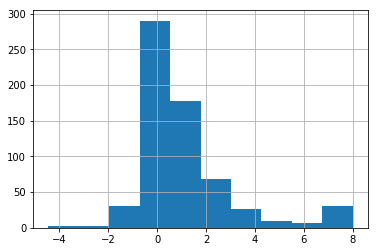

In [144]:
%matplotlib inline
(-ab_bind_mCSM_HM["ddG(kcal/mol)"]).hist()